In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(forecast)
library(tseries)

library(dplyr)
library(ggplot2)

#2.1
df <-read.csv("/content/Electricity Price Data.csv", header = TRUE)
df

Electricity_Generation,NGAS,ElecPrice,CPI,Month
<dbl>,<dbl>,<dbl>,<dbl>,<int>
7812.956,126.482,6.27,127.5,1
7007.047,109.935,6.33,128.0,2
7309.408,104.646,6.37,128.6,3
6771.430,117.205,6.35,128.9,4
6750.369,117.011,6.46,129.1,5
6759.771,110.800,6.71,129.9,6
7036.440,115.117,6.92,130.5,7
7283.526,113.950,6.89,131.6,8
6618.043,112.926,6.85,132.5,9


## Section 1

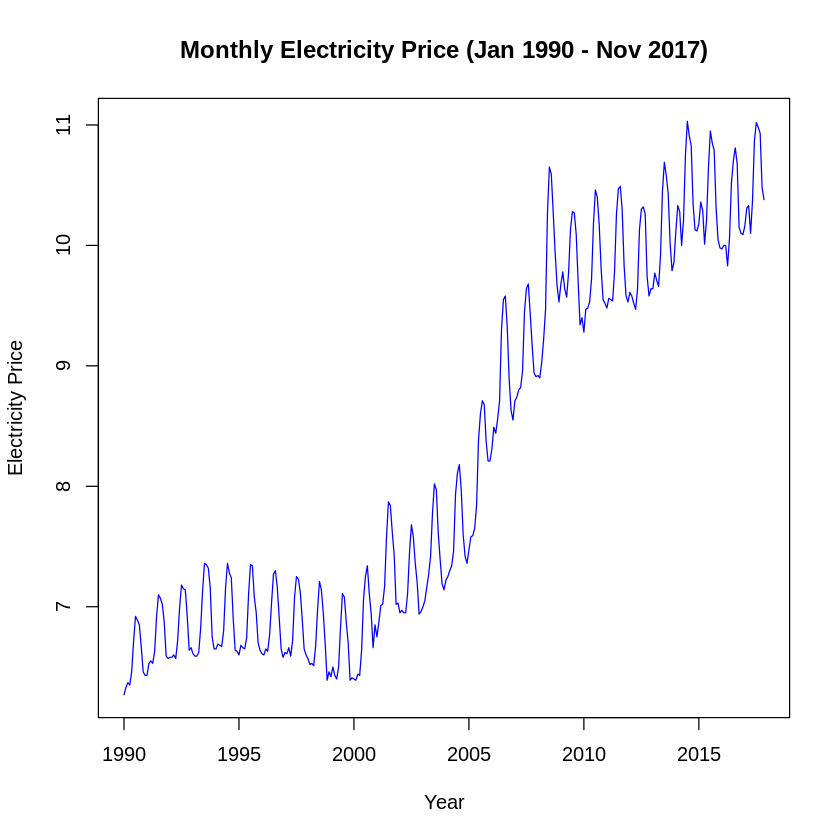

In [ ]:
# Convert ElecPrice column to time series
elec_ts <- ts(df$ElecPrice, start = c(1990, 1), frequency = 12)

plot(elec_ts, main = "Monthly Electricity Price (Jan 1990 - Nov 2017)",
     xlab = "Year", ylab = "Electricity Price", col = "blue")


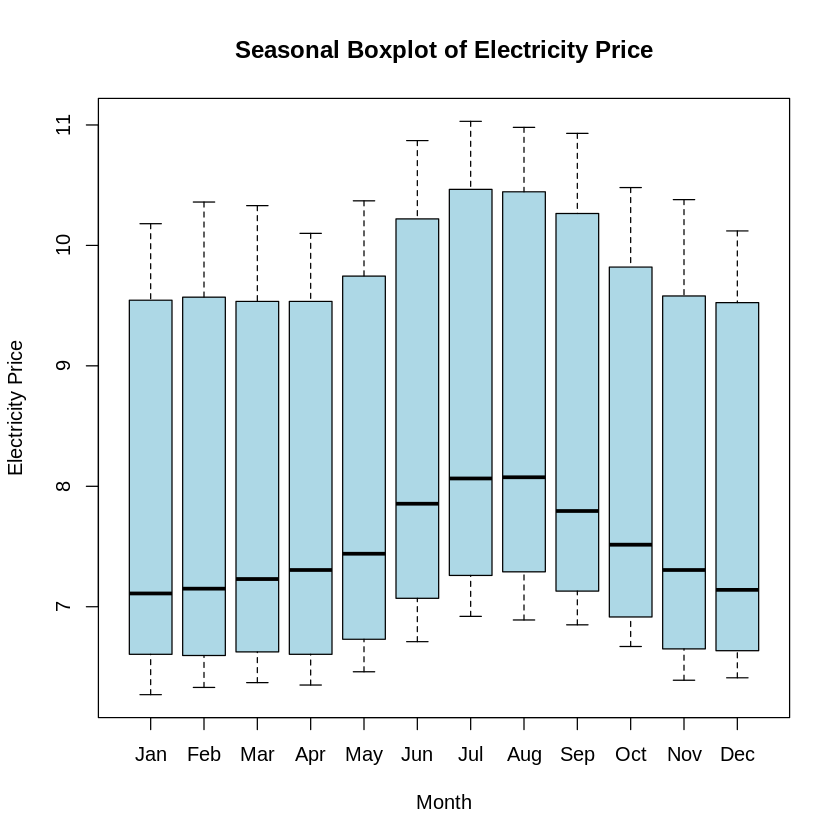

In [ ]:
month_labels <- month.abb  # Jan, Feb, ..., Dec
boxplot(df$ElecPrice ~ factor(df$Month, levels = 1:12, labels = month_labels),
        xlab = "Month", ylab = "Electricity Price",
        main = "Seasonal Boxplot of Electricity Price",
        col = "lightblue")

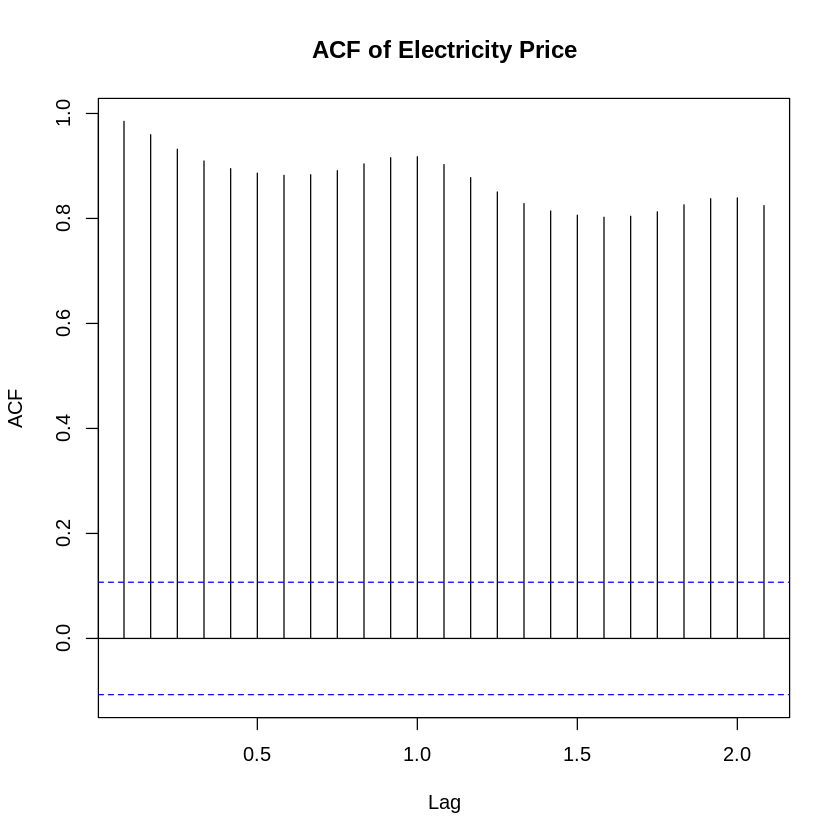

In [ ]:
acf(elec_ts, main = "ACF of Electricity Price")

In [ ]:
install.packages("TSA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



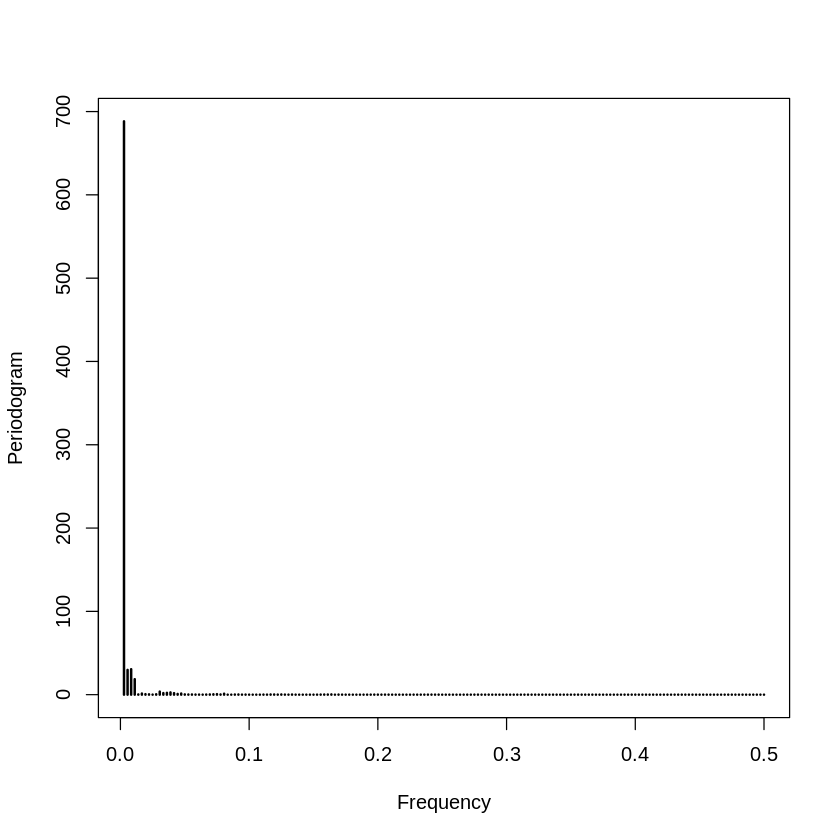

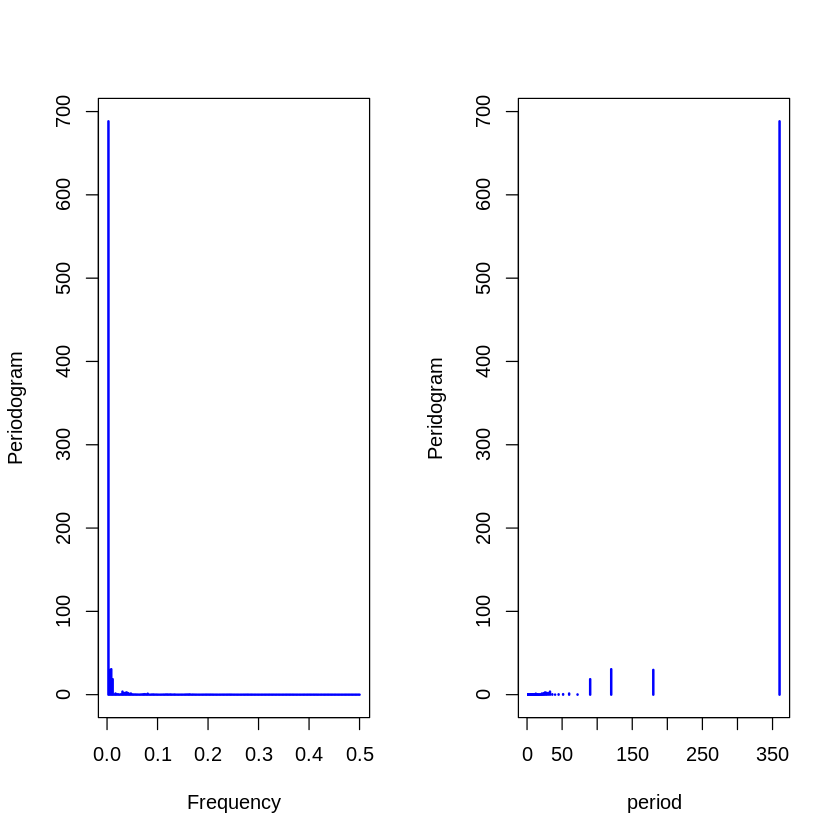

In [ ]:
# Periodogram for Sales Series
library(TSA)

detrend<-lm(df$ElecPrice ~ factor(df$Month, levels = 1:12, labels = month_labels))
prdgrm=periodogram(detrend$residuals)
period=1/prdgrm$freq
par(mfrow=c(1,2))
periodogram(detrend$residuals,col="blue")
plot(period,prdgrm$spec, type="h",col="blue",ylab="Peridogram",lwd=2)

In [ ]:
result <- data.frame(
  Period = period,
  Frequency = prdgrm$freq,
  Amplitude = prdgrm$spec

)

print(result)


        Period   Frequency    Amplitude
1   360.000000 0.002777778 6.882515e+02
2   180.000000 0.005555556 2.970687e+01
3   120.000000 0.008333333 3.054944e+01
4    90.000000 0.011111111 1.856917e+01
5    72.000000 0.013888889 2.723720e-01
6    60.000000 0.016666667 1.360398e+00
7    51.428571 0.019444444 6.200337e-01
8    45.000000 0.022222222 4.121401e-01
9    40.000000 0.025000000 8.237460e-02
10   36.000000 0.027777778 4.775947e-01
11   32.727273 0.030555556 3.652615e+00
12   30.000000 0.033333333 1.879204e+00
13   27.692308 0.036111111 2.195995e+00
14   25.714286 0.038888889 2.705159e+00
15   24.000000 0.041666667 1.815650e+00
16   22.500000 0.044444444 8.663303e-01
17   21.176471 0.047222222 1.376636e+00
18   20.000000 0.050000000 3.377354e-01
19   18.947368 0.052777778 2.030507e-01
20   18.000000 0.055555556 2.359996e-01
21   17.142857 0.058333333 1.429524e-01
22   16.363636 0.061111111 1.253614e-01
23   15.652174 0.063888889 5.531285e-02
24   15.000000 0.066666667 1.655370e-01


In [ ]:
n <- nrow(df)
time <- 1:n

cos1 <- cos(2 * pi * (1 / n) * time)
sin1 <- sin(2 * pi * (1 / n) * time)

cos2 <- cos(2 * pi * (2 / n) * time)
sin2 <- sin(2 * pi * (2 / n) * time)

cos3 <- cos(2 * pi * (3 / n) * time)
sin3 <- sin(2 * pi * (3 / n) * time)

cos4 <- cos(2 * pi * (4 / n) * time)
sin4 <- sin(2 * pi * (4 / n) * time)

fit <- lm(df$ElecPrice ~ time + cos1 + sin1 + cos2 + sin2 + cos3 + sin3 + cos4 + sin4)
summary(fit)



Call:
lm(formula = df$ElecPrice ~ time + cos1 + sin1 + cos2 + sin2 + 
    cos3 + sin3 + cos4 + sin4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60807 -0.28063 -0.09065  0.27381  1.02031 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.2784713  0.0900886  69.692  < 2e-16 ***
time         0.0116424  0.0005247  22.189  < 2e-16 ***
cos1         0.4381914  0.0263184  16.650  < 2e-16 ***
sin1        -0.5820838  0.0618260  -9.415  < 2e-16 ***
cos2        -0.1487194  0.0263184  -5.651 3.49e-08 ***
sin2         0.2342949  0.0384027   6.101 3.00e-09 ***
cos3         0.0708613  0.0263184   2.692  0.00746 ** 
sin3        -0.0146092  0.0322491  -0.453  0.65084    
cos4        -0.0804872  0.0263184  -3.058  0.00241 ** 
sin4        -0.0984153  0.0297967  -3.303  0.00106 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3406 on 325 degrees of freedom
Multiple R-squared:  0.9513,	Adjusted R-squared:

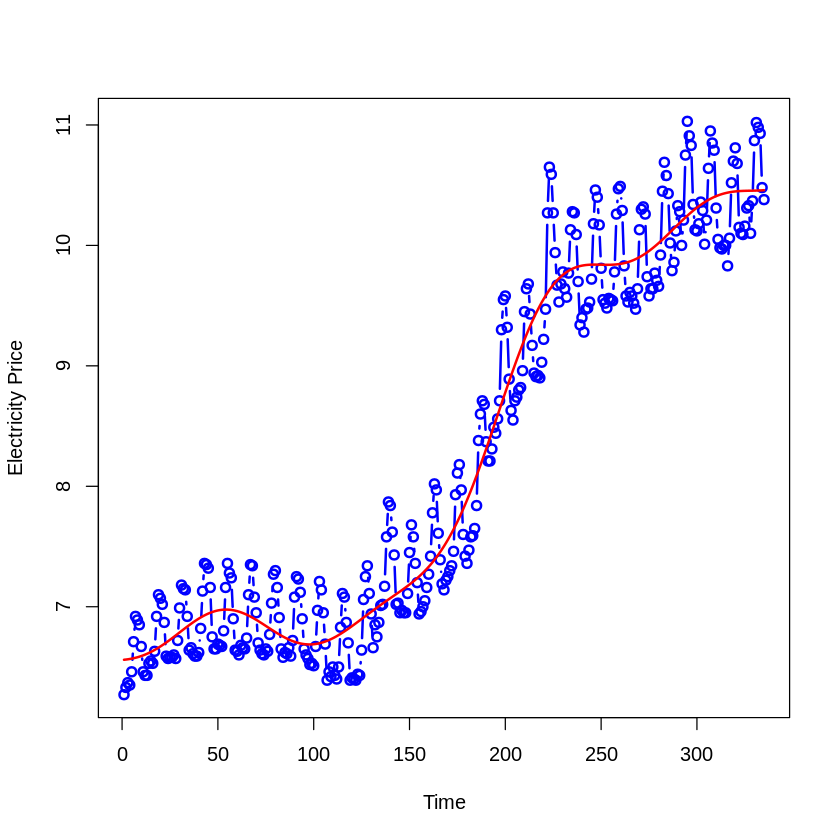

In [ ]:
plot.ts(df$ElecPrice[1:n], type = "b", col = "blue", ylab = "Electricity Price", lwd = 2)

lines(predict(fit), col = "red", lwd = 2)


## Section 2


##Piece wise trend model (no seasonality)


In [ ]:
n_total <- nrow(df)
n_test <- 35
n_train <- n_total - n_test


df$Month <- factor(df$Month, levels = 1:12, labels = month.abb)
df$Time <- 1:nrow(df)


train_df <- df[1:n_train, ]
test_df <- df[(n_train + 1):n_total, ]


In [ ]:
lgen <- log(train_df$Electricity_Generation)
n_gen <- lgen
time <- seq_along(n_gen)

piece1 <- as.numeric(time <= 119)
piece2 <- as.numeric(time > 119 & time <= 239)
piece3 <- as.numeric(time > 239)

t1 <- time * piece1
t2 <- time * piece2
t3 <- time * piece3

t1_sq <- t1^2
t2_sq <- t2^2
t3_sq <- t3^2

fit_trend_only <- lm(n_gen ~ t1 + t1_sq + t2 + t2_sq + t3 + t3_sq)

summary(fit_trend_only)



Call:
lm(formula = n_gen ~ t1 + t1_sq + t2 + t2_sq + t3 + t3_sq)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11277 -0.05103 -0.01021  0.04017  0.17307 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.837e+00  1.698e-02 520.529  < 2e-16 ***
t1           1.529e-03  6.540e-04   2.338  0.02005 *  
t1_sq       -1.540e-06  5.285e-06  -0.291  0.77090    
t2           2.164e-03  2.653e-04   8.156 1.03e-14 ***
t2_sq       -6.429e-06  1.072e-06  -5.996 5.94e-09 ***
t3           1.214e-03  4.679e-04   2.595  0.00995 ** 
t3_sq       -2.292e-06  1.668e-06  -1.374  0.17045    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06103 on 293 degrees of freedom
Multiple R-squared:  0.418,	Adjusted R-squared:  0.4061 
F-statistic: 35.08 on 6 and 293 DF,  p-value: < 2.2e-16


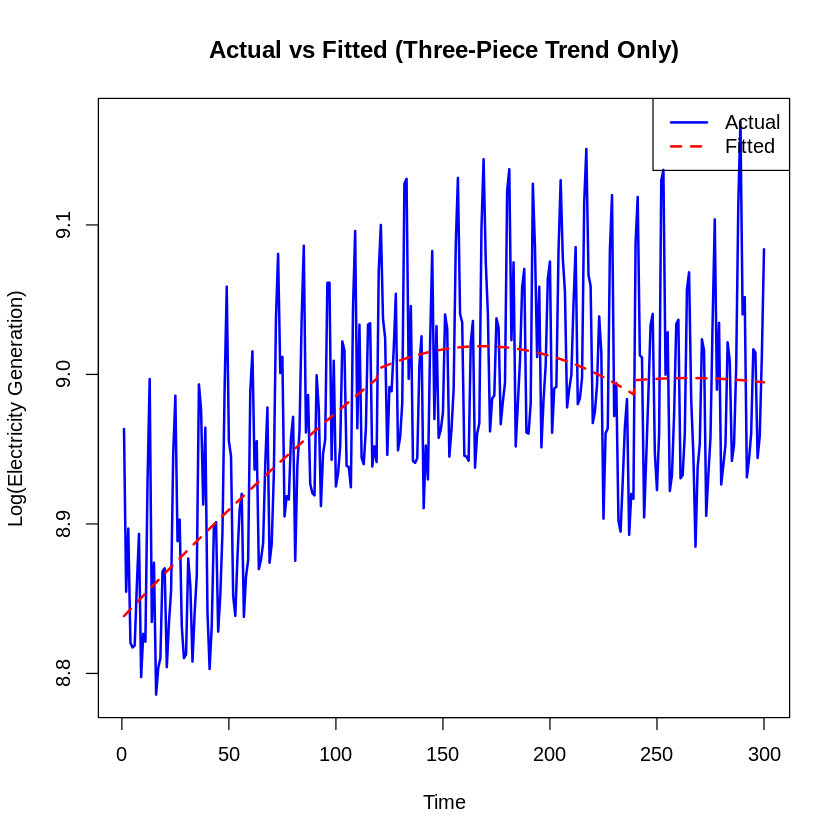

In [ ]:
fitted_vals <- fitted(fit_trend_only)

plot(time, n_gen, type = "l", col = "blue", lwd = 2,
     ylab = "Log(Electricity Generation)", xlab = "Time",
     main = "Actual vs Fitted (Three-Piece Trend Only)")
lines(time, fitted_vals, col = "red", lwd = 2, lty = 2)
legend("topright", legend = c("Actual", "Fitted"),
       col = c("blue", "red"), lty = c(1, 2), lwd = 2)


## 3 piece trend model (trend + seasonality)





In [ ]:
# Log-transform
lgen <- log(train_df$Electricity_Generation)
n_gen <- lgen
time <- seq_along(n_gen)

# Create piece indicators
piece1 <- as.numeric(time <= 119)
piece2 <- as.numeric(time > 119 & time <= 239)
piece3 <- as.numeric(time > 239)

# Create piecewise trend terms
t1 <- time * piece1
t2 <- time * piece2
t3 <- time * piece3

t1_sq <- t1^2
t2_sq <- t2^2
t3_sq <- t3^2

# Create seasonality (shared across all pieces)
for (k in 1:6) {
  assign(paste0("sin", k), sin(2 * pi * (k/12) * time))
  assign(paste0("cos", k), cos(2 * pi * (k/12) * time))
}

# Fit the model: separate trend for each piece + common seasonality
fit_piece_trend <- lm(n_gen ~
  t1 + t1_sq + t2 + t2_sq + t3 + t3_sq +
  sin1 + cos1 + sin2 + cos2 + sin3 + cos3 +
  sin4 + cos4 + sin5 + cos5 + sin6 + cos6)

# Summary
summary(fit_piece_trend)



Call:
lm(formula = n_gen ~ t1 + t1_sq + t2 + t2_sq + t3 + t3_sq + sin1 + 
    cos1 + sin2 + cos2 + sin3 + cos3 + sin4 + cos4 + sin5 + cos5 + 
    sin6 + cos6)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.081631 -0.012633 -0.000028  0.015553  0.054233 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  8.836e+00  6.546e-03 1349.808  < 2e-16 ***
t1           1.467e-03  2.521e-04    5.821 1.60e-08 ***
t1_sq       -4.050e-07  2.037e-06   -0.199   0.8425    
t2           2.067e-03  1.023e-04   20.206  < 2e-16 ***
t2_sq       -5.878e-06  4.137e-07  -14.208  < 2e-16 ***
t3           9.562e-04  1.808e-04    5.288 2.49e-07 ***
t3_sq       -1.346e-06  6.449e-07   -2.086   0.0378 *  
sin1         1.898e-02  1.928e-03    9.843  < 2e-16 ***
cos1         3.741e-02  1.920e-03   19.478  < 2e-16 ***
sin2         5.171e-02  1.921e-03   26.914  < 2e-16 ***
cos2         2.378e-02  1.921e-03   12.380  < 2e-16 ***
sin3        -3.890e-03  1.926e-03   -2.

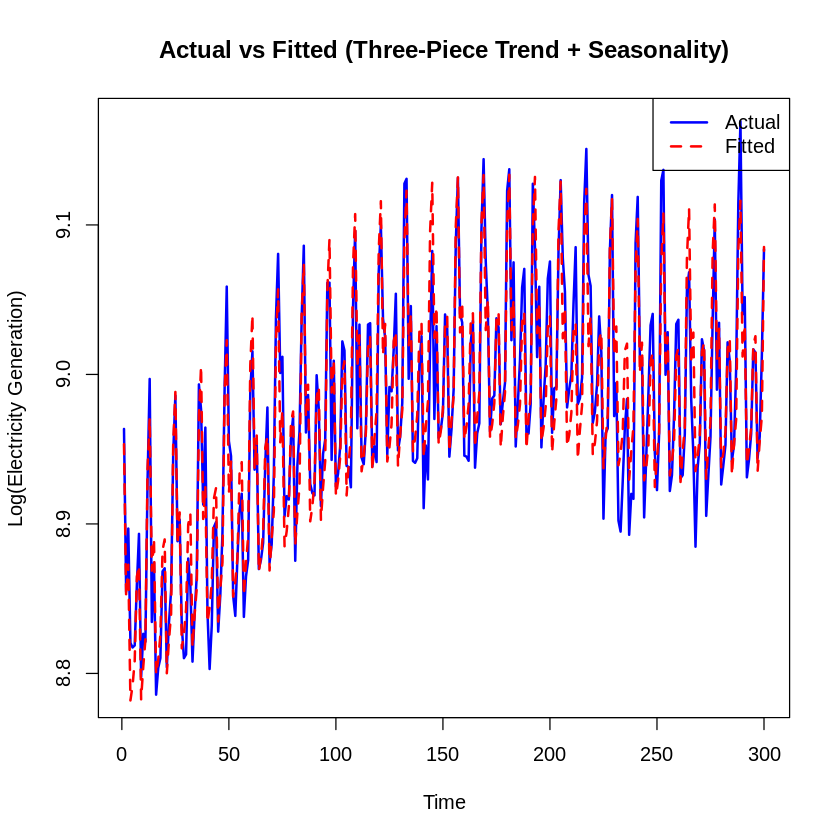

In [ ]:
fitted_vals <- fitted(fit_piece_trend)

plot(time, n_gen, type = "l", col = "blue", lwd = 2,
     ylab = "Log(Electricity Generation)", xlab = "Time",
     main = "Actual vs Fitted (Three-Piece Trend + Seasonality)")
lines(time, fitted_vals, col = "red", lwd = 2, lty = 2)
legend("topright", legend = c("Actual", "Fitted"),
       col = c("blue", "red"), lty = c(1, 2), lwd = 2)


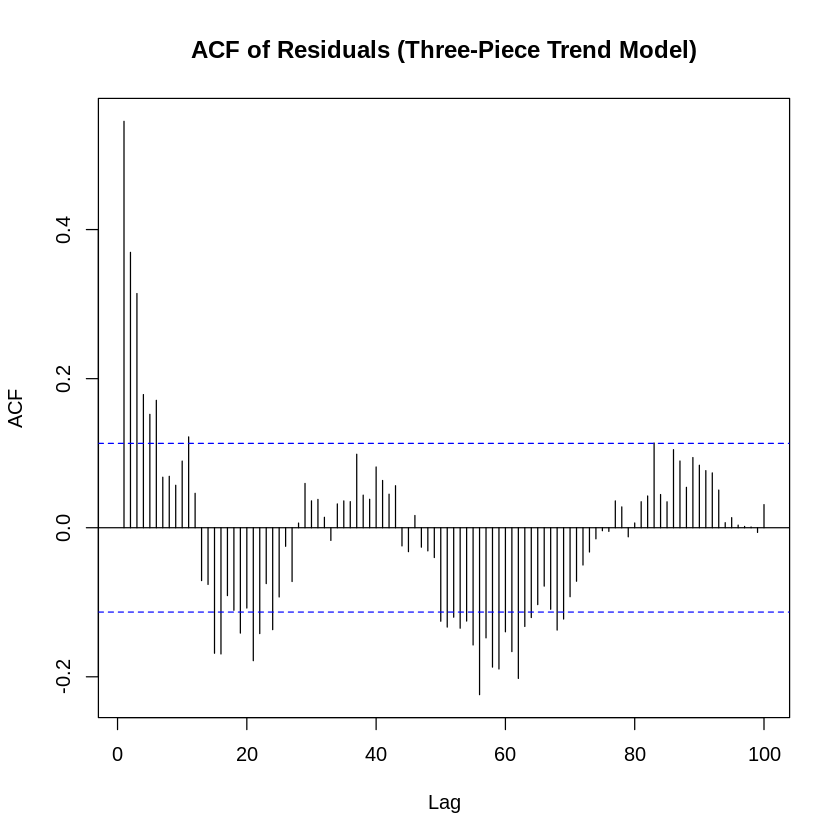

In [ ]:
# Extract residuals from the model
resid_vals <- residuals(fit_piece_trend)

# Plot ACF
acf(resid_vals,lag.max = 100, main = "ACF of Residuals (Three-Piece Trend Model)")



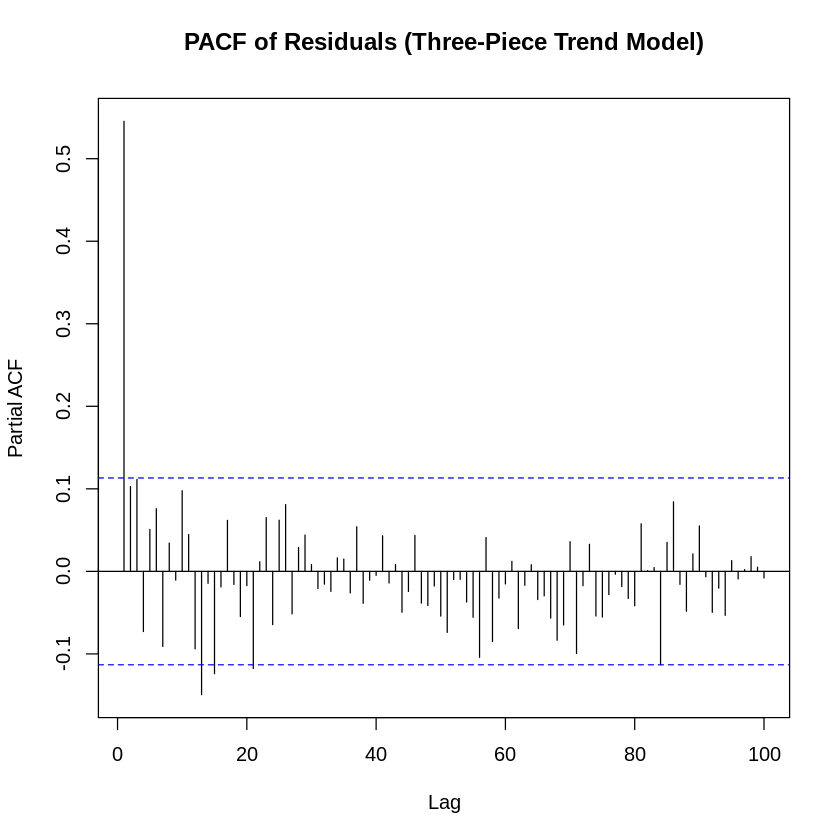

In [ ]:
pacf(resid_vals,lag.max = 100, main = "PACF of Residuals (Three-Piece Trend Model)")


In [ ]:
# Step 1: Get fitted values on log scale
train_df$Fitted_log <- fitted(fit_piece_trend)

# Step 2: Back-transform to original scale
train_df$Fitted <- exp(train_df$Fitted_log)

# Step 3: Define metrics
mape <- function(actual, predicted) {
  mean(abs((actual - predicted) / actual)) * 100
}

rmse <- function(actual, predicted) {
  sqrt(mean((actual - predicted)^2))
}

mae <- function(actual, predicted) {
  mean(abs(actual - predicted))
}

# Step 4: Compute metrics
mape_train <- mape(train_df$Electricity_Generation, train_df$Fitted)
rmse_train <- rmse(train_df$Electricity_Generation, train_df$Fitted)
mae_train  <- mae(train_df$Electricity_Generation, train_df$Fitted)

# Step 5: Print results
cat("Train MAPE:", round(mape_train, 2), "%\n")
cat("Train RMSE:", round(rmse_train, 2), "\n")
cat("Train MAE:", round(mae_train, 2), "\n")


Train MAPE: 1.78 %
Train RMSE: 183.3 
Train MAE: 141.64 


## test data fitting

In [ ]:
# Generate time from test_df
test_time <- test_df$Time

# Create piecewise trend terms
test_piece1 <- as.numeric(test_time <= 119)
test_piece2 <- as.numeric(test_time > 119 & test_time <= 239)
test_piece3 <- as.numeric(test_time > 239)

test_t1 <- test_time * test_piece1
test_t2 <- test_time * test_piece2
test_t3 <- test_time * test_piece3

test_t1_sq <- test_t1^2
test_t2_sq <- test_t2^2
test_t3_sq <- test_t3^2

# Create shared seasonal terms
test_terms <- data.frame(
  t1 = test_t1, t1_sq = test_t1_sq,
  t2 = test_t2, t2_sq = test_t2_sq,
  t3 = test_t3, t3_sq = test_t3_sq
)

for (k in 1:6) {
  test_terms[[paste0("sin", k)]] <- sin(2 * pi * (k/12) * test_time)
  test_terms[[paste0("cos", k)]] <- cos(2 * pi * (k/12) * test_time)
}

# Predict using pre-trained model (log scale)
test_df$Predicted_log <- predict(fit_piece_trend, newdata = test_terms)

# Convert to original scale
test_df$Predicted <- exp(test_df$Predicted_log)


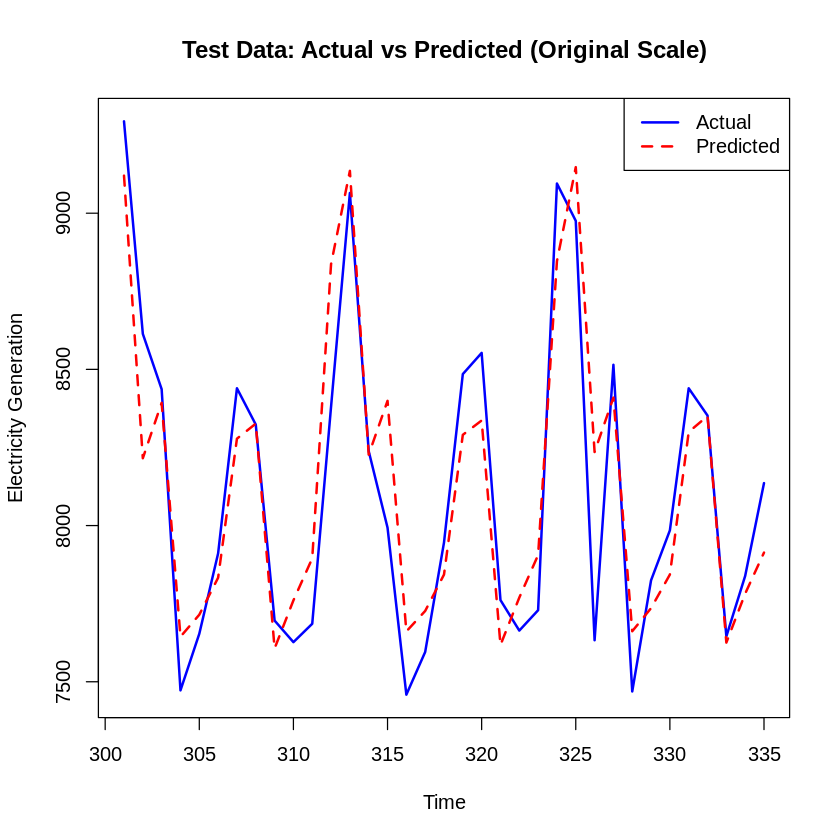

In [ ]:
# Plot actual and predicted values for test data
plot(test_df$Time, test_df$Electricity_Generation, type = "l", col = "blue", lwd = 2,
     ylab = "Electricity Generation", xlab = "Time",
     main = "Test Data: Actual vs Predicted (Original Scale)")
lines(test_df$Time, test_df$Predicted, col = "red", lwd = 2, lty = 2)

legend("topright", legend = c("Actual", "Predicted"),
       col = c("blue", "red"), lty = c(1, 2), lwd = 2)


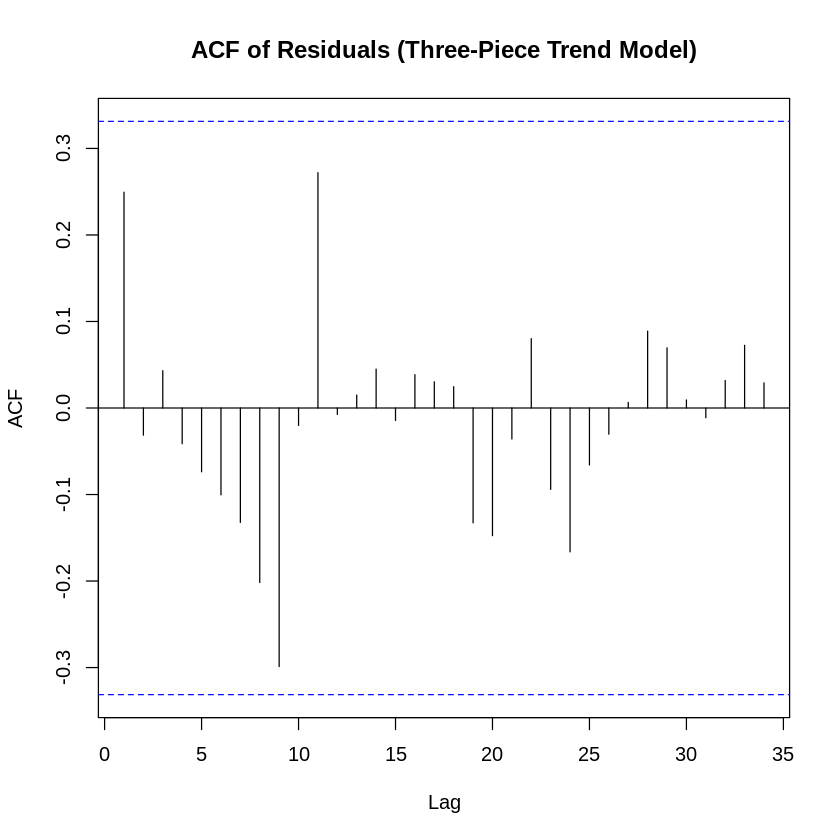

In [ ]:
Residuals_test <- test_df$Electricity_Generation - test_df$Predicted

# Plot ACF
acf(Residuals_test,lag.max = 100, main = "ACF of Residuals (Three-Piece Trend Model)")



In [ ]:
# Calculate metrics for the test set
mape_test <- mape(test_df$Electricity_Generation, test_df$Predicted)
rmse_test <- rmse(test_df$Electricity_Generation, test_df$Predicted)
mae_test  <- mae(test_df$Electricity_Generation, test_df$Predicted)

# Print results
cat("Test MAPE:", round(mape_test, 2), "%\n")
cat("Test RMSE:", round(rmse_test, 2), "\n")
cat("Test MAE:", round(mae_test, 2), "\n")

Test MAPE: 2.02 %
Test RMSE: 208.65 
Test MAE: 163.79 


## Arima errors for 3 peice trend model

In [ ]:
# Clean and align data
df_clean <- df[complete.cases(df[, c("Electricity_Generation", "log_NGAS", "CPI_scaled", "Month")]), ]

# Response variable
n_gen <- log(df_clean$Electricity_Generation)

# Regressor matrix (e.g., seasonal + trend or economic variables)
xreg <- model.matrix(~ log_NGAS + CPI_scaled + Month, data = df_clean)[, -1]

# Scale regressors (optional but recommended for numerical stability)
xreg_scaled <- scale(xreg)


In [ ]:
fit_arima_resid <- Arima(n_gen, xreg = xreg_scaled, order = c(2, 0, 5))
summary(fit_arima_resid)


Series: n_gen 
Regression with ARIMA(2,0,5) errors 

Coefficients:
         ar1     ar2     ma1      ma2      ma3      ma4      ma5  intercept
      0.0419  0.9150  0.5238  -0.5928  -0.1149  -0.0307  -0.1453     8.9750
s.e.  0.0607  0.0583  0.0802   0.0732   0.0721   0.0715   0.0580     0.0142
      log_NGAS  CPI_scaled  MonthFeb  MonthMar  MonthApr  MonthMay  MonthJun
        0.0158      0.0485   -0.0278   -0.0227   -0.0477   -0.0448   -0.0402
s.e.    0.0029      0.0115    0.0012    0.0014    0.0014    0.0015    0.0016
      MonthJul  MonthAug  MonthSep  MonthOct  MonthNov  MonthDec
       -0.0255   -0.0241   -0.0483   -0.0439   -0.0387   -0.0087
s.e.    0.0015    0.0016    0.0015    0.0014    0.0014    0.0012

sigma^2 = 0.0003915:  log likelihood = 833.79
AIC=-1623.58   AICc=-1620.27   BIC=-1540.07

Training set error measures:
                       ME       RMSE       MAE         MPE      MAPE      MASE
Training set 0.0004001719 0.01914384 0.0151772 0.004041614 0.1690246 0.2938496


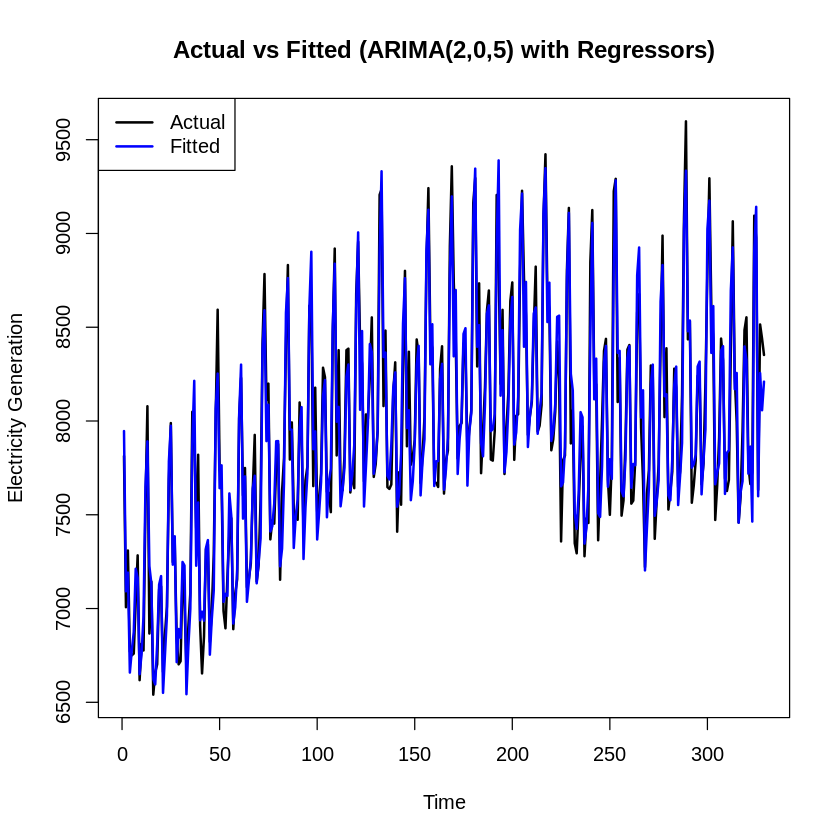

In [ ]:
# Get fitted values (on log scale)
fitted_vals <- fitted(fit_arima_resid)

# Convert both fitted and actual back to original scale (undo log)
actual_vals <- exp(n_gen)
fitted_vals_original_scale <- exp(fitted_vals)

# Plot
plot(actual_vals, type = "l", col = "black", lwd = 2,
     ylab = "Electricity Generation", xlab = "Time",
     main = "Actual vs Fitted (ARIMA(2,0,5) with Regressors)")
lines(fitted_vals_original_scale, col = "blue", lwd = 2)
legend("topleft", legend = c("Actual", "Fitted"), col = c("black", "blue"),
       lty = 1, lwd = 2)


In [ ]:
library(forecast)

# Step 1: Define train/test split
n <- nrow(df_clean)
n_test <- 35
n_train <- n - n_test

# Step 2: Create response variable (log-transform)
n_gen <- log(df_clean$Electricity_Generation)

# Step 3: Create regressor matrix (should already be cleaned & scaled)
xreg <- model.matrix(~ log_NGAS + CPI_scaled + Month, data = df_clean)[, -1]
xreg_scaled <- scale(xreg)

# Step 4: Split into training and test sets
y_train <- n_gen[1:n_train]
y_test <- n_gen[(n_train + 1):n]

x_train <- xreg_scaled[1:n_train, ]
x_test <- xreg_scaled[(n_train + 1):n, ]

# Step 5: Fit ARIMA(2,0,5) on training set
fit <- Arima(y_train, xreg = x_train, order = c(2, 0, 5))

# Step 6: Forecast on test set
fc <- forecast(fit, xreg = x_test, h = n_test)

# Step 7: Back-transform forecasts and actuals
y_train_actual <- exp(y_train)
y_train_fitted <- exp(fitted(fit))

y_test_actual <- exp(y_test)
y_test_forecast <- exp(fc$mean)

# Step 8: Compute metrics

# Training metrics
train_mape <- mean(abs((y_train_actual - y_train_fitted) / y_train_actual)) * 100
train_rmse <- sqrt(mean((y_train_actual - y_train_fitted)^2))
train_mae  <- mean(abs(y_train_actual - y_train_fitted))

# Test metrics
test_mape <- mean(abs((y_test_actual - y_test_forecast) / y_test_actual)) * 100
test_rmse <- sqrt(mean((y_test_actual - y_test_forecast)^2))
test_mae  <- mean(abs(y_test_actual - y_test_forecast))

# Print results
cat("Training MAPE:", round(train_mape, 4), "%\n")
cat("Training RMSE:", round(train_rmse, 4), "\n")
cat("Training MAE :", round(train_mae, 4), "\n\n")

cat("Test MAPE    :", round(test_mape, 4), "%\n")
cat("Test RMSE    :", round(test_rmse, 4), "\n")
cat("Test MAE     :", round(test_mae, 4), "\n")


Training MAPE: 1.42 %
Training RMSE: 143.6237 
Training MAE : 112.6036 

Test MAPE    : 6.9875 %
Test RMSE    : 890.9262 
Test MAE     : 572.9175 


## Section: 2.2

## exponential smoothing

In [ ]:
elec_ts <- ts(df$ElecPrice, start = c(1990, 1), frequency = 12)

train_ts <- window(elec_ts, end = c(2014, 12))
test_ts  <- window(elec_ts, start = c(2015, 1))

hw_model <- hw(train_ts, seasonal = "additive", h = length(test_ts))

summary(hw_model)



Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
hw(y = train_ts, h = length(test_ts), seasonal = "additive")

  Smoothing parameters:
    alpha = 0.8158 
    beta  = 0.0252 
    gamma = 0.1838 

  Initial states:
    l = 6.3523 
    b = 0.0079 
    s = -0.262 -0.2331 0.0232 0.2117 0.3326 0.4424
           0.2766 -0.0092 -0.1642 -0.1678 -0.2116 -0.2386

  sigma:  0.0831

     AIC     AICc      BIC 
236.2942 238.4644 299.2585 

Error measures:
                      ME       RMSE        MAE         MPE      MAPE      MASE
Training set 0.001089607 0.08088441 0.06098874 0.005927669 0.7544166 0.2722374
                  ACF1
Training set 0.2014507

Forecasts:
         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
Jan 2015       10.21401 10.107469 10.32054 10.051072 10.37694
Feb 2015       10.30255 10.163344 10.44175 10.089655 10.51544
Mar 2015       10.25751 10.090495 10.42452 10.002085 10.51292
Apr 2015       10.22860 10.03647

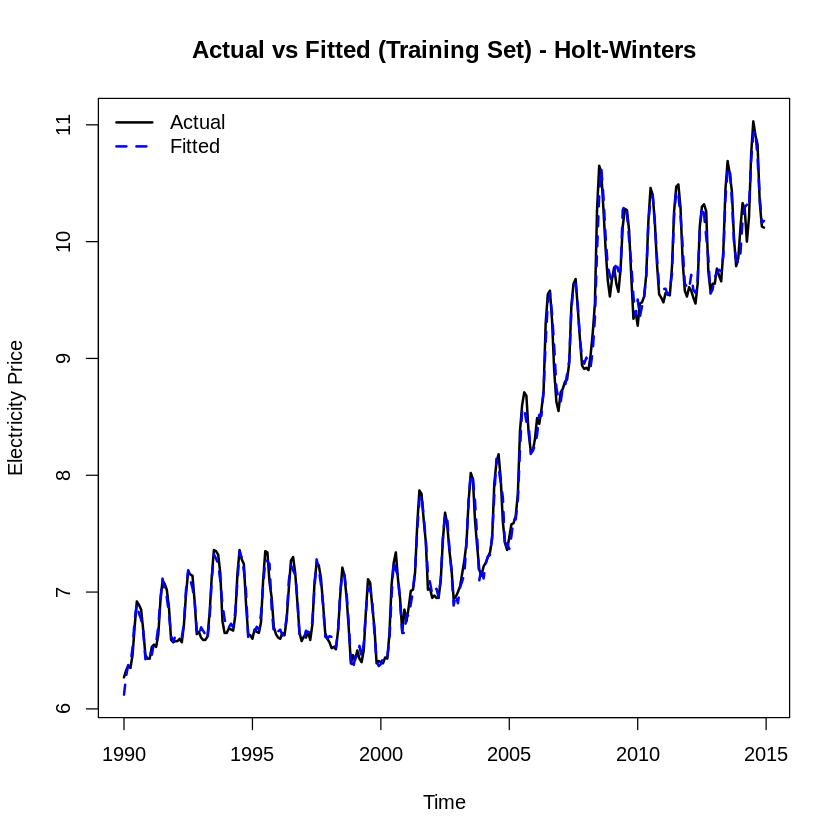

In [ ]:
train_ts <- ts(train_df$ElecPrice, start = c(1990, 1), frequency = 12)

fitted_ts_exp <- ts(fitted(hw_model), start = start(train_ts), frequency = frequency(train_ts))

ts.plot(train_ts, fitted_ts_exp,
        col = c("black", "blue"),
        lty = c(1, 2),
        lwd = 2,
        ylab = "Electricity Price",
        main = "Actual vs Fitted (Training Set) - Holt-Winters")

legend("topleft",
       legend = c("Actual", "Fitted"),
       col = c("black", "blue"),
       lty = c(1, 2),
       lwd = 2,
       bty = "n")

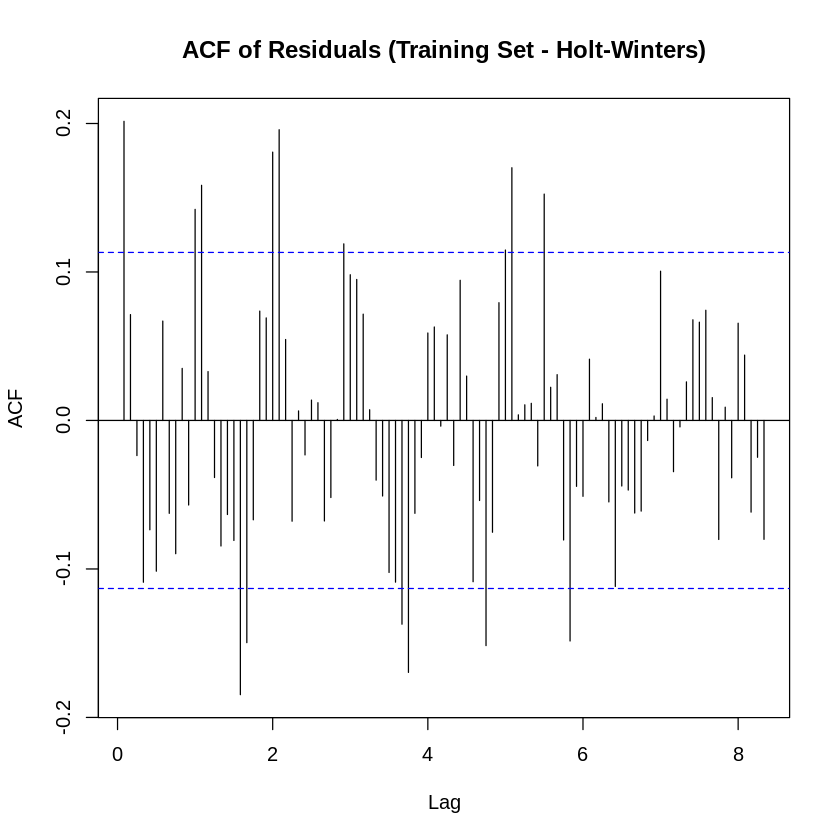

In [ ]:

fitted_train_exp <- fitted(hw_model)

residuals_train_exp <- train_ts - fitted_ts_exp

acf(residuals_train_exp, lag.max = 100,
    main = "ACF of Residuals (Training Set - Holt-Winters)")


ETS(M,Ad,M) 

Call:
ets(y = train_ts)

  Smoothing parameters:
    alpha = 0.7916 
    beta  = 0.0389 
    gamma = 0.1775 
    phi   = 0.98 

  Initial states:
    l = 6.5241 
    b = -0.0044 
    s = 0.9663 0.972 1.0101 1.0384 1.0505 1.0635
           1.0361 0.9911 0.9705 0.9718 0.968 0.9615

  sigma:  0.0091

     AIC     AICc      BIC 
149.7649 152.1991 216.4330 

Training set error measures:
                      ME       RMSE        MAE        MPE      MAPE      MASE
Training set 0.005947275 0.07417662 0.05458364 0.07209677 0.6750759 0.2436467
                  ACF1
Training set 0.1071075

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.005947275,0.07417662,0.05458364,0.07209677,0.6750759,0.2436467,0.1071075,NA
Test set,-0.287109583,0.33553392,0.30235972,-2.75336869,2.9011892,1.3496528,0.7793178,1.395499


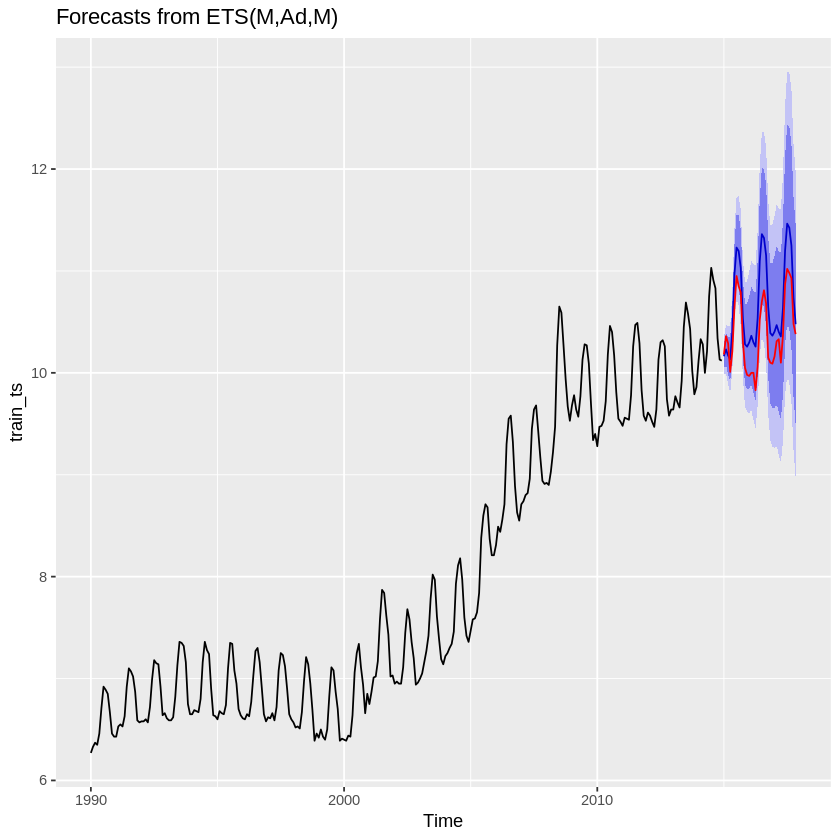

In [ ]:

# Create ts object
elec_ts <- ts(df$ElecPrice, start = c(1990, 1), frequency = 12)

# Train-test split (80/20 split)
train_ts <- window(elec_ts, end = c(2014, 12))
test_ts  <- window(elec_ts, start = c(2015, 1))

# Fit ETS model (auto-selects best exponential smoothing method)
ets_model <- ets(train_ts)

# Model summary
summary(ets_model)

# Forecast
ets_forecast <- forecast(ets_model, h = length(test_ts))

# Accuracy
accuracy(ets_forecast, test_ts)

# Plot
autoplot(ets_forecast) + autolayer(test_ts, series = "Test", color = "red")


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


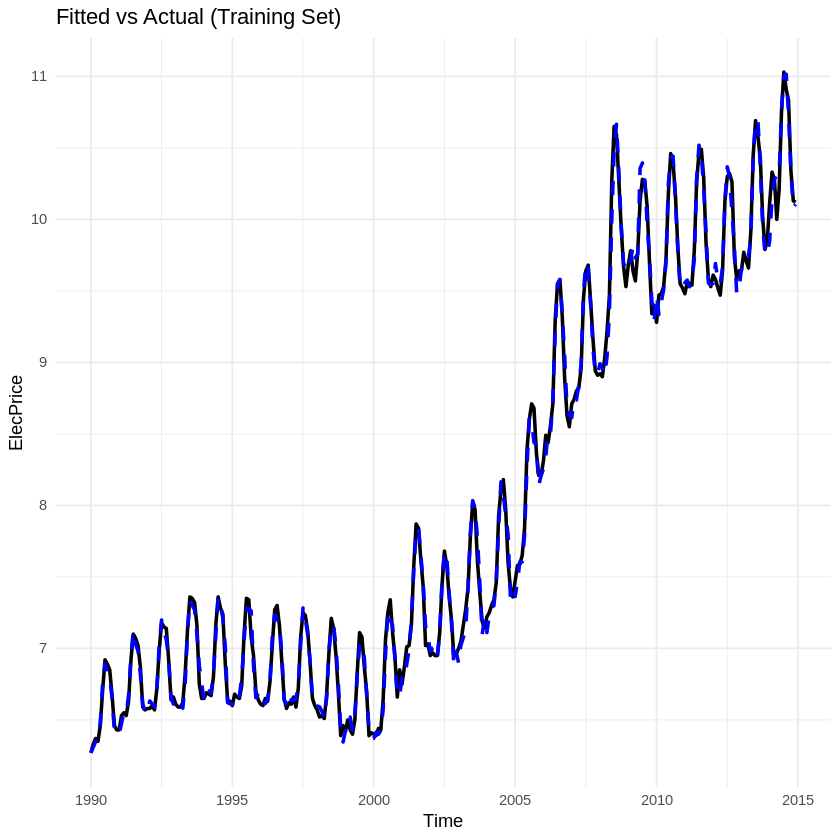

In [ ]:

fitted_values <- fitted(ets_model)

# Create time index
time_index <- time(train_ts)

# Create a data frame for ggplot
df_plot <- data.frame(
  Time = time_index,
  Actual = as.numeric(train_ts),
  Fitted = as.numeric(fitted_values)
)

# Plot
ggplot(df_plot, aes(x = Time)) +
  geom_line(aes(y = Actual), color = "black", size = 1, linetype = "solid") +
  geom_line(aes(y = Fitted), color = "blue", size = 1, linetype = "dashed") +
  labs(title = "Fitted vs Actual (Training Set)",
       y = "ElecPrice", x = "Time") +
  theme_minimal()


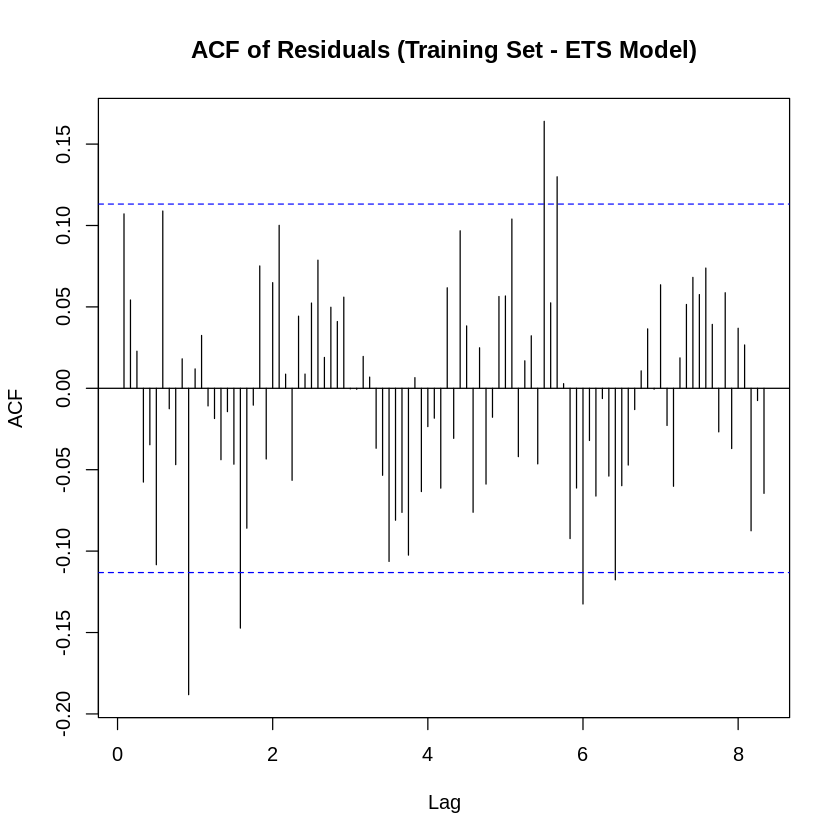

In [ ]:
# Calculate residuals
residuals_train_exp <- train_ts - fitted(ets_model)

# ACF plot for 100 lags
acf(residuals_train_exp,
    lag.max = 100,
    main = "ACF of Residuals (Training Set - ETS Model)")


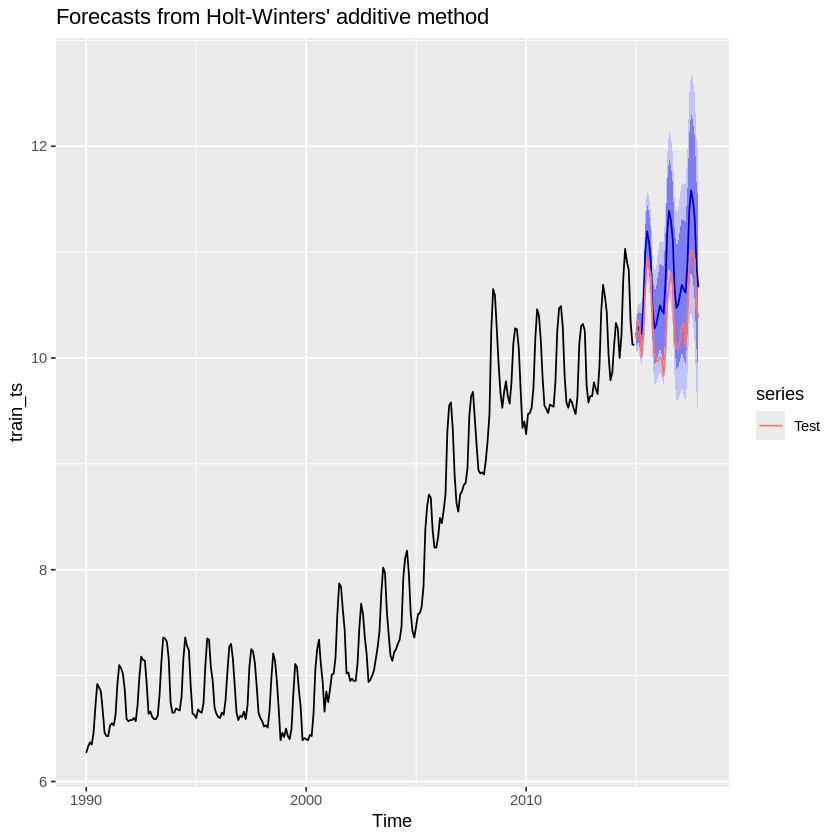

In [ ]:
autoplot(hw_model) + autolayer(test_ts, series="Test")


In [ ]:
auto_fit <- auto.arima(train_ts)
accuracy(hw_model, test_ts)
accuracy(auto_fit, test_ts)


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.001089607,0.08088441,0.06098874,0.005927669,0.7544166,0.2722374,0.2014507,NA
Test set,-0.376811678,0.41852226,0.38195161,-3.629952097,3.6796873,1.7049297,0.8108321,1.755379


ERROR: Error in testaccuracy(object, x, test, d, D): Unknown list structure


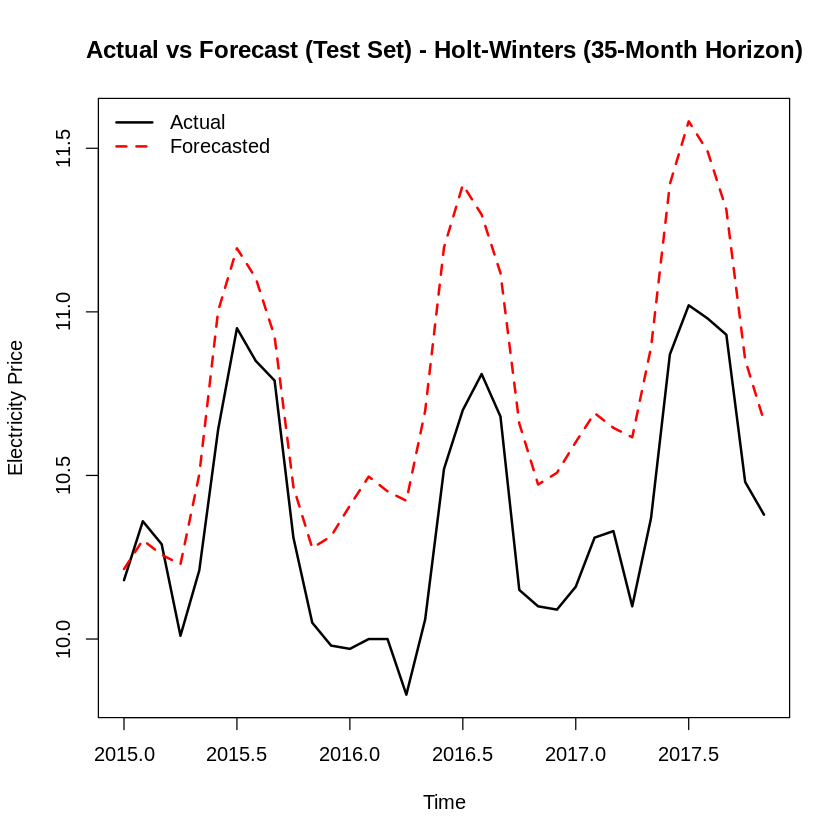

In [ ]:
horizon <- length(test_ts)

hw_model <- hw(train_ts, seasonal = "additive", h = horizon)

forecast_hw <- ts(hw_model$mean, start = start(test_ts), frequency = frequency(test_ts))

ts.plot(test_ts, forecast_hw,
        col = c("black", "red"),
        lty = c(1, 2),
        lwd = 2,
        ylab = "Electricity Price",
        main = "Actual vs Forecast (Test Set) - Holt-Winters (35-Month Horizon)")

legend("topleft",
       legend = c("Actual", "Forecasted"),
       col = c("black", "red"),
       lty = c(1, 2),
       lwd = 2,
       bty = "n")



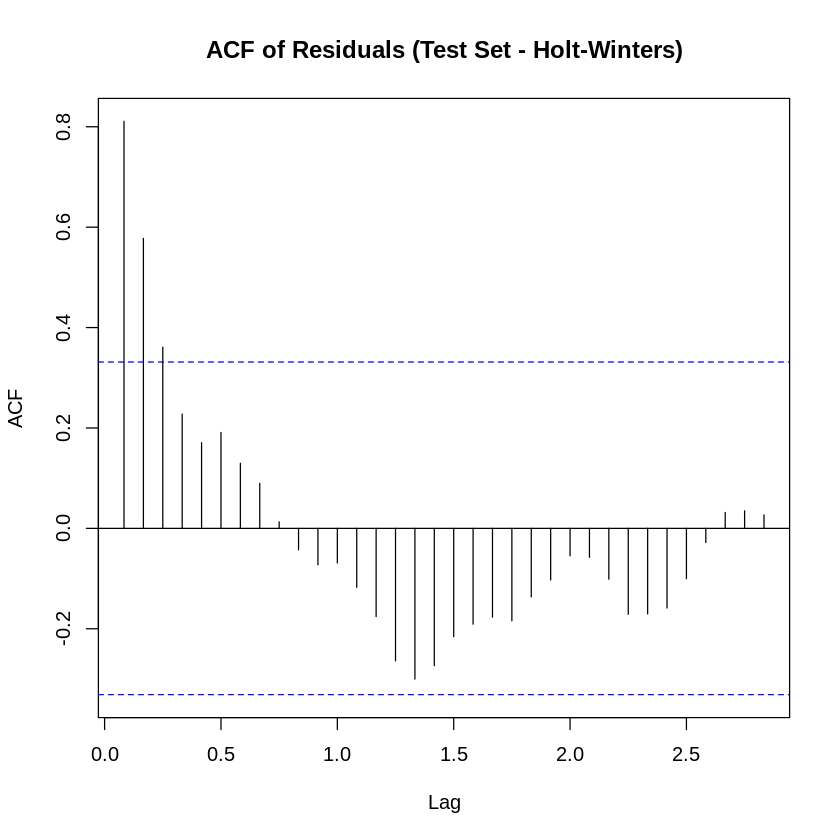

In [ ]:

residuals_test_exp <- test_ts - forecast_hw

acf(residuals_test_exp,
    main = "ACF of Residuals (Test Set - Holt-Winters)",
    lag.max = 35)


In [ ]:
mape <- function(actual, forecast) mean(abs((actual - forecast)/actual)) * 100
rmse <- function(actual, forecast) sqrt(mean((actual - forecast)^2))
mae  <- function(actual, forecast) mean(abs(actual - forecast))

mape_train_hw <- mape(train_ts, fitted(hw_model))
rmse_train_hw <- rmse(train_ts, fitted(hw_model))
mae_train_hw  <- mae(train_ts, fitted(hw_model))

mape_test_hw <- mape(test_ts, forecast_hw)
rmse_test_hw <- rmse(test_ts, forecast_hw)
mae_test_hw  <- mae(test_ts, forecast_hw)

cat("===== Holt-Winters Model Accuracy =====\n\n")

cat("▶ TRAINING SET:\n")
cat("  MAPE:", round(mape_train_hw, 4), "%\n")
cat("  RMSE:", round(rmse_train_hw, 4), "\n")
cat("  MAE :", round(mae_train_hw, 4), "\n\n")

cat("▶ TEST SET:\n")
cat("  MAPE:", round(mape_test_hw, 4), "%\n")
cat("  RMSE:", round(rmse_test_hw, 4), "\n")
cat("  MAE :", round(mae_test_hw, 4), "\n")



===== Holt-Winters Model Accuracy =====

▶ TRAINING SET:
  MAPE: 0.7544 %
  RMSE: 0.0809 
  MAE : 0.061 

▶ TEST SET:
  MAPE: 3.6797 %
  RMSE: 0.4185 
  MAE : 0.382 


## Section 3

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



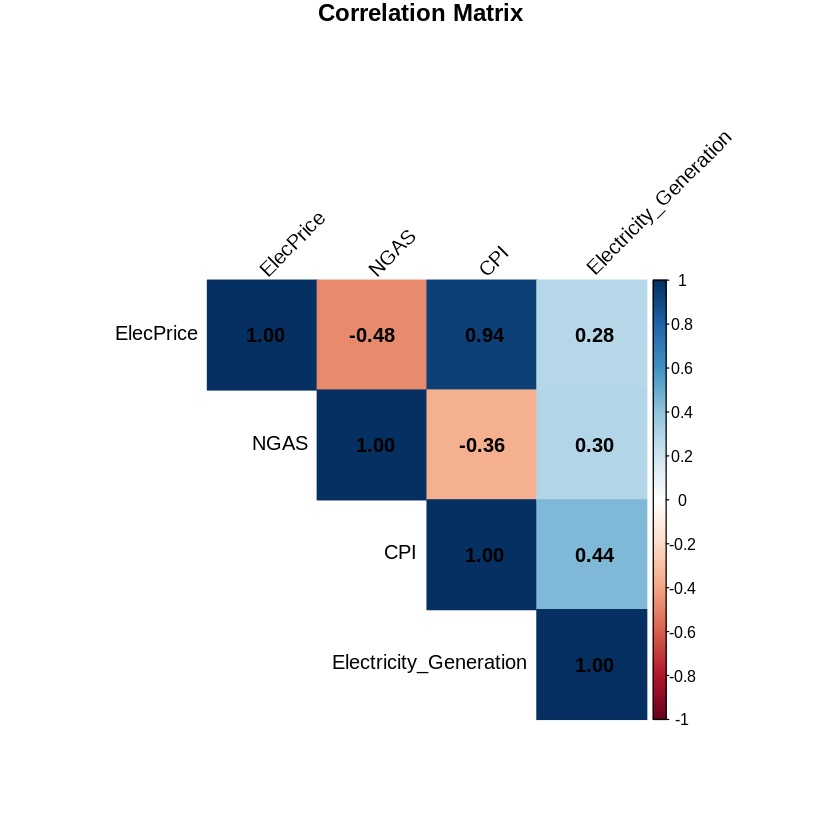

In [ ]:
install.packages("corrplot")

library(corrplot)

cor_vars <- df[, c("ElecPrice", "NGAS", "CPI", "Electricity_Generation")]

cor_matrix <- cor(cor_vars, use = "complete.obs")

corrplot(cor_matrix, method = "color",
         type = "upper",
         addCoef.col = "black",
         tl.col = "black", tl.srt = 45,
         title = "Correlation Matrix",
         mar = c(0, 0, 1, 0))


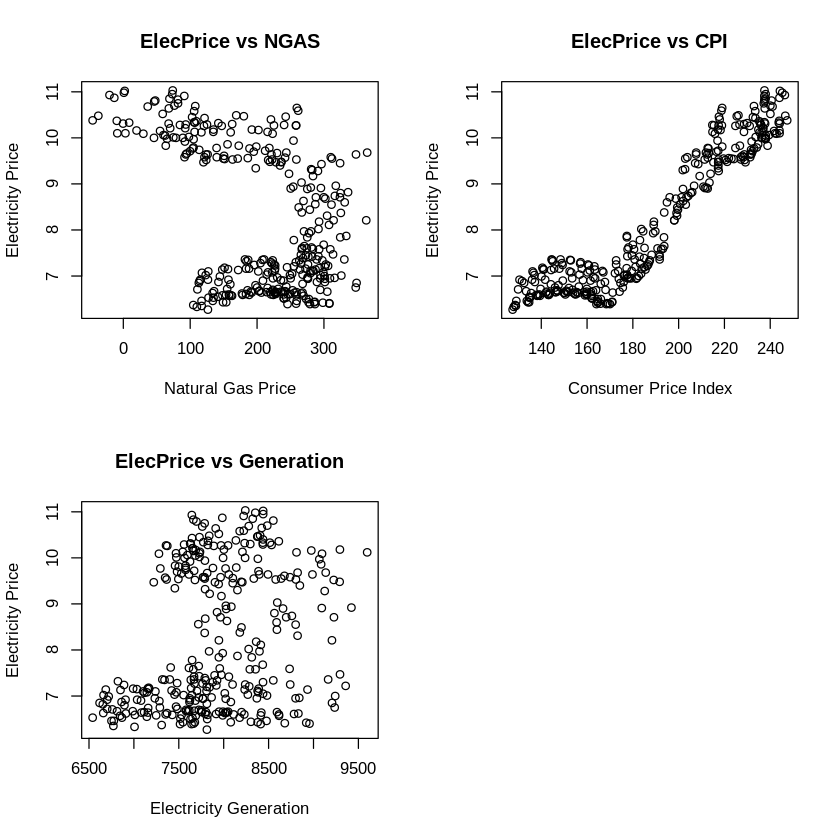

In [ ]:
par(mfrow = c(2, 2))

plot(df$NGAS, df$ElecPrice,
     main = "ElecPrice vs NGAS",
     xlab = "Natural Gas Price", ylab = "Electricity Price")

plot(df$CPI, df$ElecPrice,
     main = "ElecPrice vs CPI",
     xlab = "Consumer Price Index", ylab = "Electricity Price")

plot(df$Electricity_Generation, df$ElecPrice,
     main = "ElecPrice vs Generation",
     xlab = "Electricity Generation", ylab = "Electricity Price")

par(mfrow = c(1, 1))


In [ ]:
# Example: Convert Electricity_Generation to ts object
train_ts <- ts(train_df$Electricity_Generation, frequency = 12)  # frequency = 12 for monthly


## regression model without differencing

In [ ]:
##new
df$log_NGAS <- log(df$NGAS + 1)  # +1 to avoid log(0)
df$CPI_scaled <- scale(df$CPI)
model2 <- lm(Electricity_Generation ~ log_NGAS + ElecPrice + CPI_scaled + Month, data = df)
summary(model2)


Warning message in log(df$NGAS + 1):
“NaNs produced”



Call:
lm(formula = Electricity_Generation ~ log_NGAS + ElecPrice + 
    CPI_scaled + Month, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-841.02 -136.78    1.22  133.99  629.17 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10900.85     270.60  40.283  < 2e-16 ***
log_NGAS      194.46      18.77  10.358  < 2e-16 ***
ElecPrice    -382.65      27.37 -13.981  < 2e-16 ***
CPI_scaled    881.28      39.35  22.399  < 2e-16 ***
MonthFeb     -808.72      56.87 -14.221  < 2e-16 ***
MonthMar     -665.71      56.77 -11.726  < 2e-16 ***
MonthApr    -1412.85      57.24 -24.682  < 2e-16 ***
MonthMay    -1274.87      57.36 -22.225  < 2e-16 ***
MonthJun     -993.81      59.05 -16.830  < 2e-16 ***
MonthJul     -466.62      60.22  -7.749 1.30e-13 ***
MonthAug     -436.30      59.88  -7.287 2.59e-12 ***
MonthSep    -1215.41      59.07 -20.576  < 2e-16 ***
MonthOct    -1213.40      57.58 -21.074  < 2e-16 ***
MonthNov    -1162.16      57.34 -20.268  < 2e

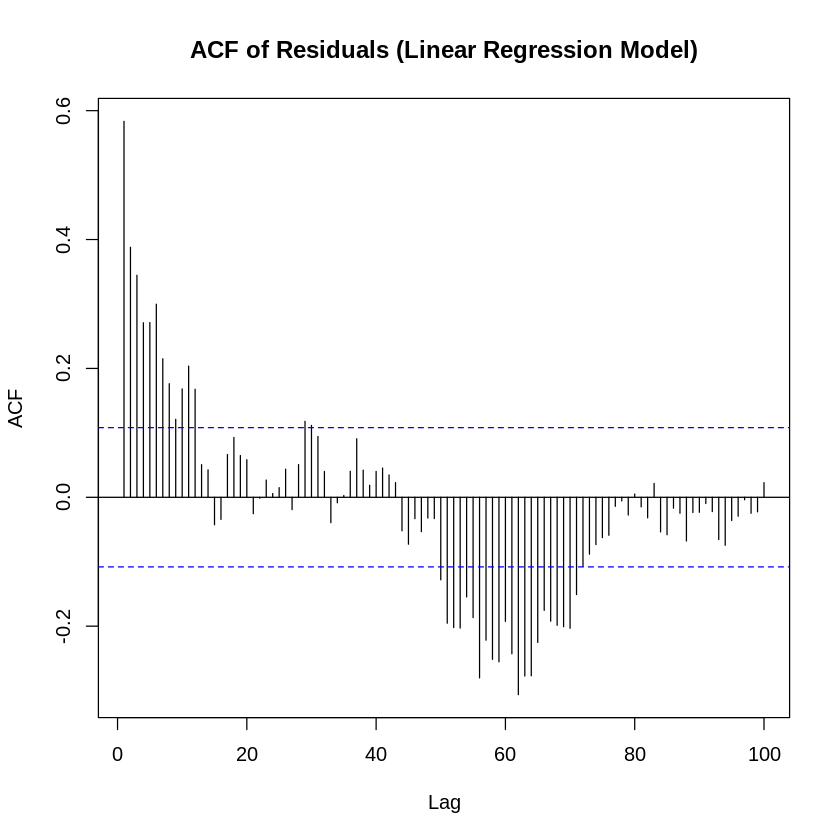

In [ ]:
# Get residuals
resid_model2 <- residuals(model2)

# Plot ACF for residuals
acf(resid_model2, lag.max = 100,
    main = "ACF of Residuals (Linear Regression Model)")


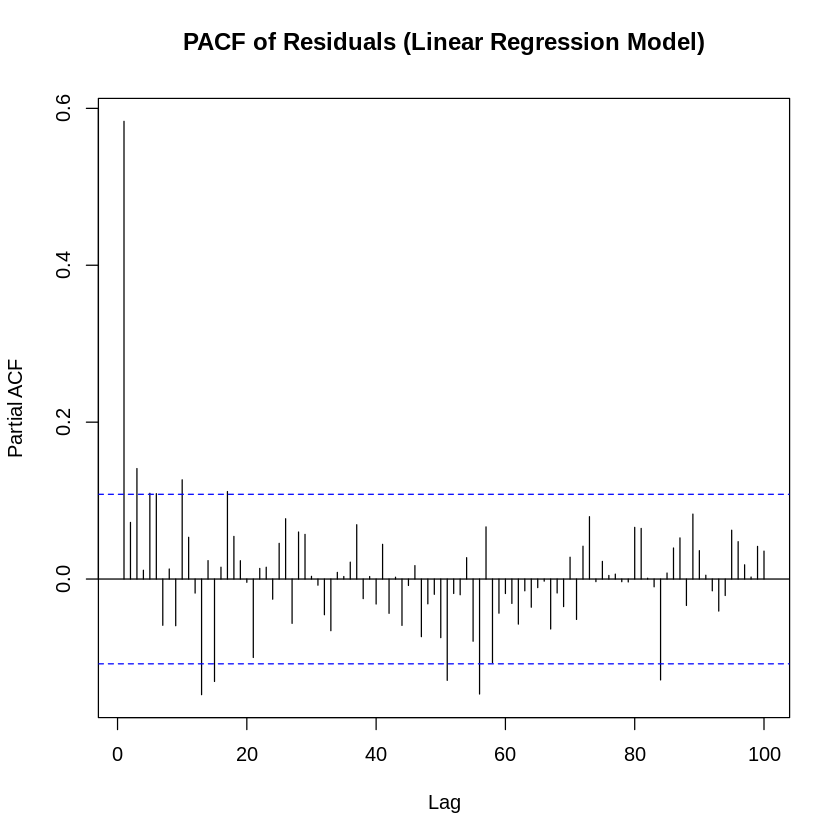

In [ ]:
# Plot ACF for residuals
pacf(resid_model2, lag.max = 100,
    main = "PACF of Residuals (Linear Regression Model)")

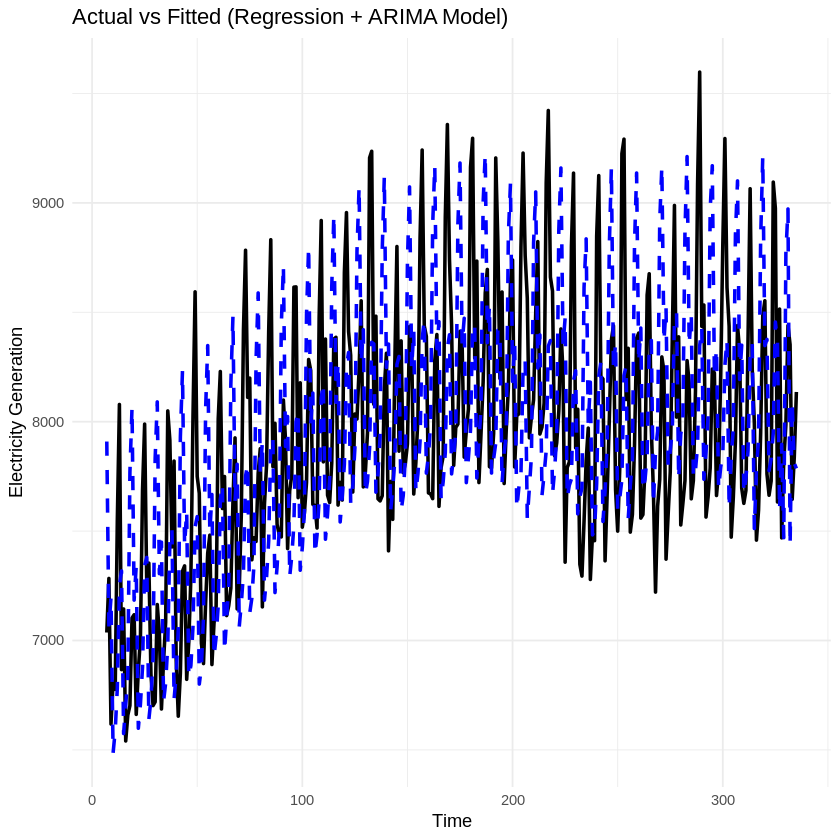

In [ ]:
library(forecast)
library(ggplot2)

# Assuming 'arima_model' is your fitted model
# and 'df$Electricity_Generation' is the full target series

# Step 1: Extract fitted values
fitted_vals <- fitted(model2)

# Step 2: Align fitted values with original data
# Fitted values will be shorter than the full series (due to lags/differencing)
start_index <- length(df$Electricity_Generation) - length(fitted_vals) + 1

# Step 3: Build plotting dataframe
df_fitted <- data.frame(
  Time = df$Time[start_index:length(df$Time)],
  Actual = df$Electricity_Generation[start_index:length(df$Electricity_Generation)],
  Fitted = as.numeric(fitted_vals)
)

# Step 4: Plot
ggplot(df_fitted, aes(x = Time)) +
  geom_line(aes(y = Actual), color = "black", size = 1) +
  geom_line(aes(y = Fitted), color = "blue", linetype = "dashed", size = 1) +
  labs(title = "Actual vs Fitted (Regression + ARIMA Model)",
       y = "Electricity Generation", x = "Time") +
  theme_minimal()


## Calculating metrics

In [ ]:
# --- 1. FIX log_NGAS safely (avoid NaNs) ---
train_df$log_NGAS <- ifelse(train_df$NGAS + 1 > 0, log(train_df$NGAS + 1), NA)
test_df$log_NGAS  <- ifelse(test_df$NGAS + 1 > 0, log(test_df$NGAS + 1), NA)


Warning message in log(test_df$NGAS + 1):
“NaNs produced”


In [ ]:
# --- 2. FIX CPI scaling (force numeric, avoid matrix class issues) ---

# Calculate mean and sd from training set
cpi_mean <- mean(train_df$CPI, na.rm = TRUE)
cpi_sd   <- sd(train_df$CPI, na.rm = TRUE)

# Apply consistent scaling to both sets
train_df$CPI_scaled <- as.numeric((train_df$CPI - cpi_mean) / cpi_sd)
test_df$CPI_scaled  <- as.numeric((test_df$CPI - cpi_mean) / cpi_sd)


In [ ]:
library(ggplot2)

# --- 1. Preprocess your full dataframe safely ---

# Step 1: Handle log(NGAS + 1) only where valid
df$log_NGAS <- NA
df$log_NGAS[df$NGAS + 1 > 0] <- log(df$NGAS[df$NGAS + 1 > 0] + 1)

# Step 2: Convert Month to factor
df$Month <- as.factor(df$Month)

# Step 3: Define split index
split_index <- floor(0.8 * nrow(df))

# Step 4: Compute CPI mean/sd on training portion and scale
cpi_mean <- mean(df$CPI[1:split_index], na.rm = TRUE)
cpi_sd   <- sd(df$CPI[1:split_index], na.rm = TRUE)

df$CPI_scaled <- as.numeric((df$CPI - cpi_mean) / cpi_sd)

# --- 2. Split into training and testing sets ---
train_df <- df[1:split_index, ]
test_df  <- df[(split_index + 1):nrow(df), ]

# --- 3. Clean test set: drop rows with NA in predictors ---
test_df <- test_df[!is.na(test_df$log_NGAS) & !is.na(test_df$CPI_scaled), ]
train_df <- train_df[!is.na(train_df$log_NGAS) & !is.na(train_df$CPI_scaled), ]

# --- 4. Fit regression model ---
model2 <- lm(Electricity_Generation ~ log_NGAS + ElecPrice + CPI_scaled + Month, data = train_df)

# --- 5. Predict on training and test data ---
pred2_train <- predict(model2, newdata = train_df)
pred2_test  <- predict(model2, newdata = test_df)

# --- 6. Evaluate model performance ---

# Actual values
actual_train <- train_df$Electricity_Generation
actual_test  <- test_df$Electricity_Generation

# Training metrics
mape_train <- mean(abs(actual_train - pred2_train) / actual_train) * 100
rmse_train <- sqrt(mean((actual_train - pred2_train)^2))
mae_train  <- mean(abs(actual_train - pred2_train))

# Test metrics
mape_test <- mean(abs(actual_test - pred2_test) / actual_test) * 100
rmse_test <- sqrt(mean((actual_test - pred2_test)^2))
mae_test  <- mean(abs(actual_test - pred2_test))

# --- 7. Print results ---
cat("TRAIN:\n")
cat("MAPE:", round(mape_train, 2), "%\n")
cat("RMSE:", round(rmse_train, 2), "\n")
cat("MAE:", round(mae_train, 2), "\n\n")

cat("TEST:\n")
cat("MAPE:", round(mape_test, 2), "%\n")
cat("RMSE:", round(rmse_test, 2), "\n")
cat("MAE:", round(mae_test, 2), "\n")


TRAIN:
MAPE: 1.73 %
RMSE: 169.21 
MAE: 135.93 

TEST:
MAPE: 8.12 %
RMSE: 972.16 
MAE: 663.55 


### Arima error on regression model

In [ ]:
# Step 1: Ensure complete cases across all variables used in the model
df_clean <- df[complete.cases(df[, c("Electricity_Generation", "log_NGAS", "CPI_scaled", "Month")]), ]

# Step 2: Re-create the regressor matrix
xreg <- model.matrix(~ log_NGAS + CPI_scaled + Month, data = df_clean)[, -1]

# Step 3: Fit the ARIMA model
arima_model <- Arima(df_clean$Electricity_Generation, xreg = xreg, order = c(1, 0, 0))

# Step 4: Summary
summary(arima_model)


Series: df_clean$Electricity_Generation 
Regression with ARIMA(1,0,0) errors 

Coefficients:
         ar1  intercept  log_NGAS  CPI_scaled   MonthFeb   MonthMar    MonthApr
      0.7865  7694.2868  200.9339    286.8297  -829.9761  -689.2360  -1403.9328
s.e.  0.0348   164.0526   28.4879     35.6187    33.9452    44.1284     51.0425
        MonthMay    MonthJun   MonthJul   MonthAug    MonthSep    MonthOct
      -1320.8964  -1187.6639  -760.0272  -718.7892  -1416.2394  -1301.8258
s.e.     55.0196     56.9502    56.7691    56.5562     54.9811     51.0652
        MonthNov   MonthDec
      -1156.7372  -271.5474
s.e.     45.2421    33.8661

sigma^2 = 29585:  log likelihood = -2153.17
AIC=4338.34   AICc=4340.08   BIC=4399.07

Training set error measures:
                   ME     RMSE      MAE         MPE     MAPE      MASE
Training set 1.254196 168.0367 133.8055 -0.02866302 1.678117 0.3231014
                   ACF1
Training set -0.1588812

R-squared: 0.1315 


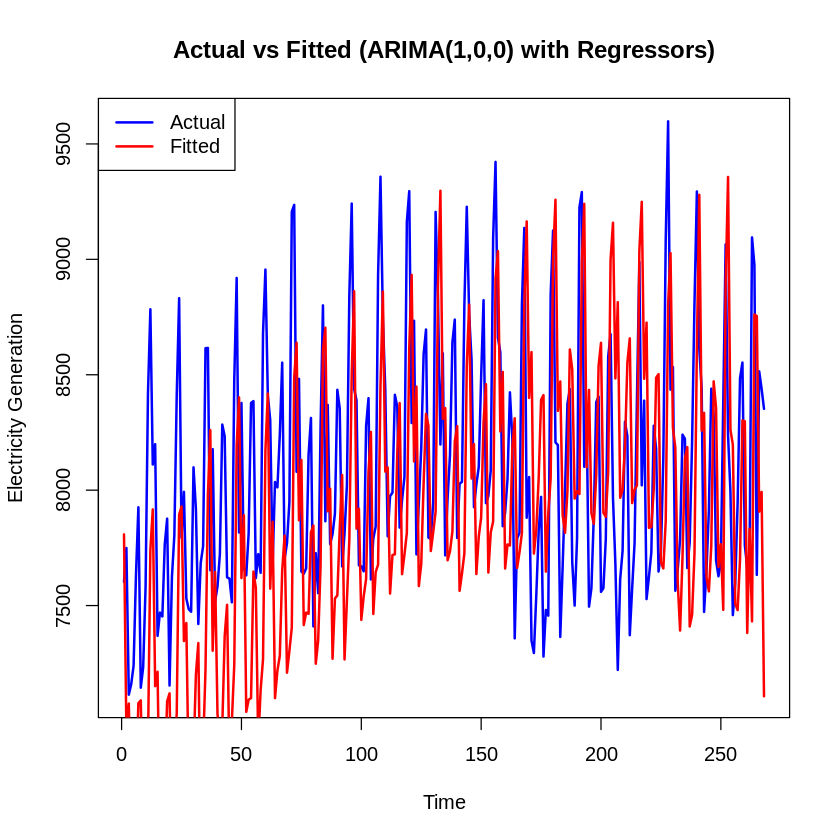

In [ ]:
# Trim the actual values to match the length of fitted values
n_fit <- length(fitted_vals)
actual_trimmed <- tail(df_clean$Electricity_Generation, n_fit)

# Create the plot data frame
results_df <- data.frame(
  Time = seq_len(n_fit),
  Actual = actual_trimmed,
  Fitted = fitted_vals
)

# Plot
plot(results_df$Time, results_df$Actual, type = "l", col = "blue", lwd = 2,
     ylab = "Electricity Generation", xlab = "Time",
     main = "Actual vs Fitted (ARIMA(1,0,0) with Regressors)")
lines(results_df$Time, results_df$Fitted, col = "red", lwd = 2)
legend("topleft", legend = c("Actual", "Fitted"),
       col = c("blue", "red"), lty = 1, lwd = 2)

# R-squared
r2 <- cor(results_df$Actual, results_df$Fitted)^2
cat("R-squared:", round(r2, 4), "\n")


In [ ]:
library(forecast)

# Step 1: Ensure clean data
df_clean <- df[complete.cases(df[, c("Electricity_Generation", "log_NGAS", "CPI_scaled", "Month")]), ]

# Step 2: Define train/test split
n <- nrow(df_clean)
n_test <- 24
n_train <- n - n_test

train_df <- df_clean[1:n_train, ]
test_df <- df_clean[(n_train + 1):n, ]

# Step 3: Create xreg matrices
xreg_train <- model.matrix(~ log_NGAS + CPI_scaled + Month, data = train_df)[, -1]
xreg_test <- model.matrix(~ log_NGAS + CPI_scaled + Month, data = test_df)[, -1]

# Step 4: Fit ARIMA(1,0,0) with regressors on training set
fit <- Arima(train_df$Electricity_Generation, xreg = xreg_train, order = c(1, 0, 0))

# Step 5: Forecast on test set
forecast_vals <- forecast(fit, xreg = xreg_test, h = n_test)

# Step 6: Compute accuracy metrics
actuals <- test_df$Electricity_Generation
metrics <- accuracy(forecast_vals, actuals)
print(metrics)


                      ME      RMSE      MAE         MPE     MAPE      MASE
Training set   0.2469152  156.6347 125.2452 -0.03481241 1.574158 0.3039384
Test set     817.2808977 1161.1495 817.2809  9.99907017 9.999070 1.9833331
                   ACF1
Training set -0.1315884
Test set             NA


## Section 4


Warning message in adf.test(ts_gen):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ts_gen
Dickey-Fuller = -4.2252, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


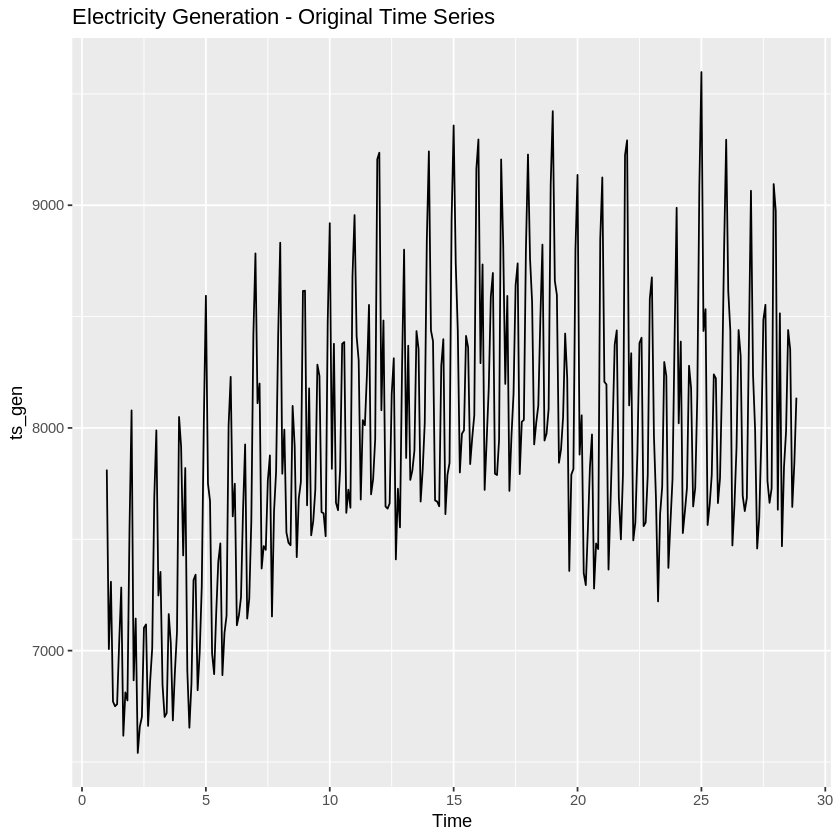

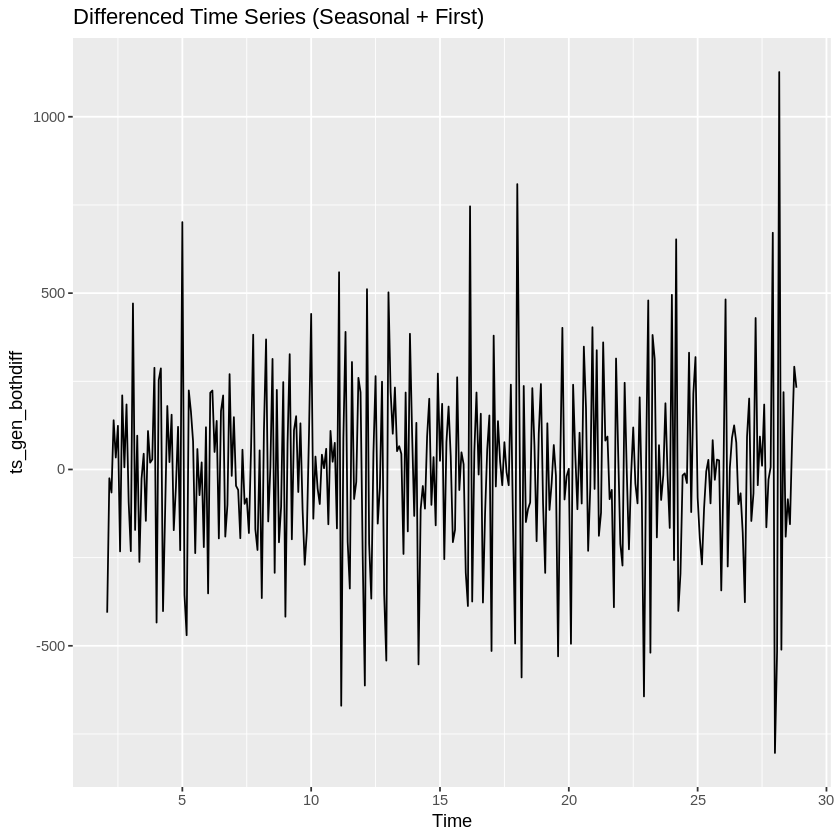

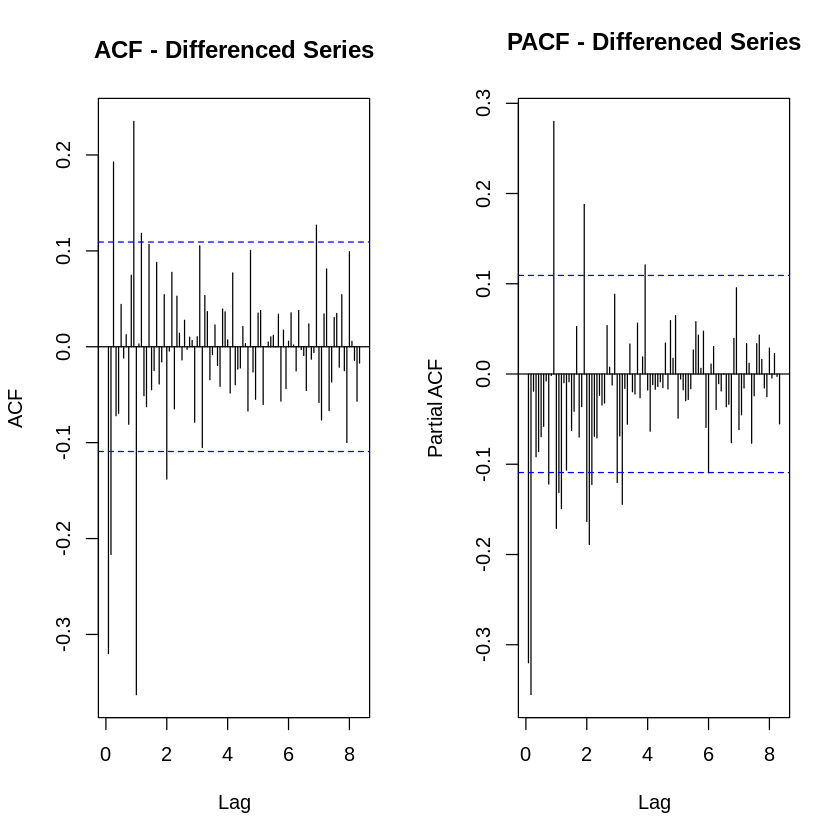

In [ ]:

ts_gen <- ts(df$Electricity_Generation, frequency = 12)

# STEP 3: Plot original series
autoplot(ts_gen) + ggtitle("Electricity Generation - Original Time Series")

# STEP 4: Check stationarity with Augmented Dickey-Fuller (ADF) test
adf.test(ts_gen)  # If p > 0.05, it's non-stationary

# STEP 5: Difference the series (regular and seasonal)
ts_gen_diff <- diff(ts_gen)                        # 1st difference
ts_gen_seasdiff <- diff(ts_gen, lag = 12)          # seasonal difference
ts_gen_bothdiff <- diff(diff(ts_gen, lag = 12))    # seasonal + 1st difference

# Plot differenced series
autoplot(ts_gen_bothdiff) + ggtitle("Differenced Time Series (Seasonal + First)")

# STEP 6: Check ACF/PACF to help identify orders
par(mfrow = c(1,2))
acf(ts_gen_bothdiff, main = "ACF - Differenced Series", lag.max = 100)
pacf(ts_gen_bothdiff, main = "PACF - Differenced Series", lag.max = 100)
par(mfrow = c(1,1))



Series: ts_gen 
ARIMA(2,0,2)(1,1,1)[12] 

Coefficients:
         ar1     ar2      ma1      ma2    sar1     sma1
      0.6810  0.3050  -0.1770  -0.3729  0.0353  -0.8769
s.e.  0.2444  0.2373   0.2346   0.1184  0.0673   0.0415

sigma^2 = 30572:  log likelihood = -2131.36
AIC=4276.71   AICc=4277.07   BIC=4303.16

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 10.64235 170.0863 133.0554 0.09506556 1.658424 0.6621127
                    ACF1
Training set 0.006274691


	Ljung-Box test

data:  Residuals from ARIMA(2,0,2)(1,1,1)[12]
Q* = 41.324, df = 18, p-value = 0.001373

Model df: 6.   Total lags used: 24



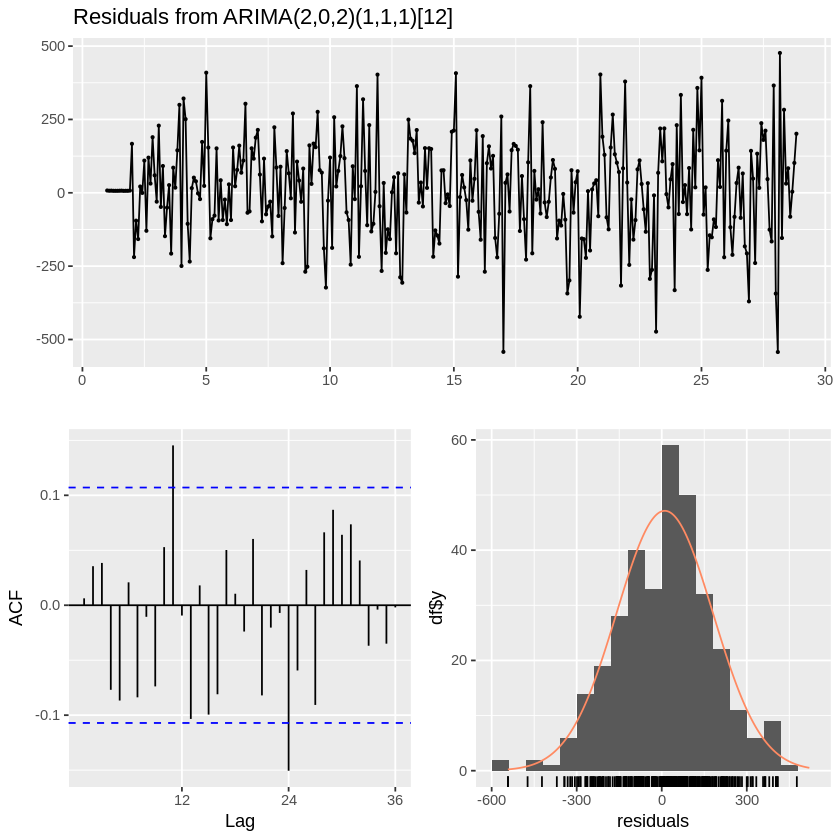

Selected ARIMA model: 2 0 2 1 1 1 12 


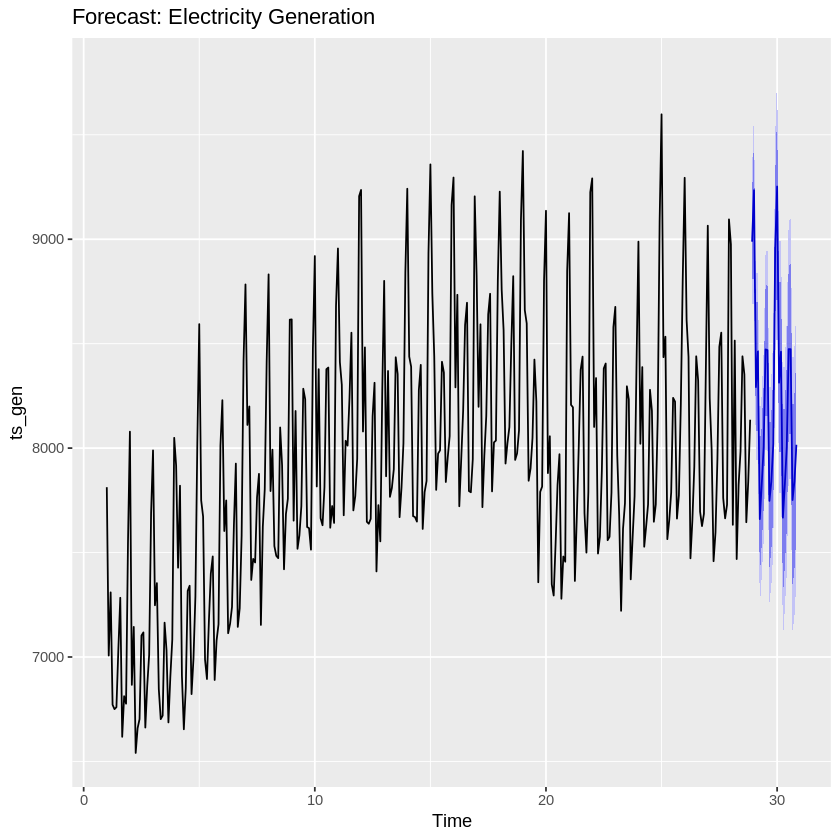

In [ ]:
# STEP 7: Fit ARIMA model (auto or manually with seasonal component)
# Use auto.arima with seasonal = TRUE to let it pick (p,d,q)(P,D,Q)[12]
fit <- auto.arima(ts_gen, seasonal = TRUE)

# STEP 8: Summary and diagnostics
summary(fit)
checkresiduals(fit)  # Includes ACF of residuals + Ljung-Box test

# STEP 9: Forecast
forecast_vals <- forecast(fit, h = 24)
autoplot(forecast_vals) + ggtitle("Forecast: Electricity Generation")

# STEP 10: Optional - Print model
cat("Selected ARIMA model:", arimaorder(fit), "\n")


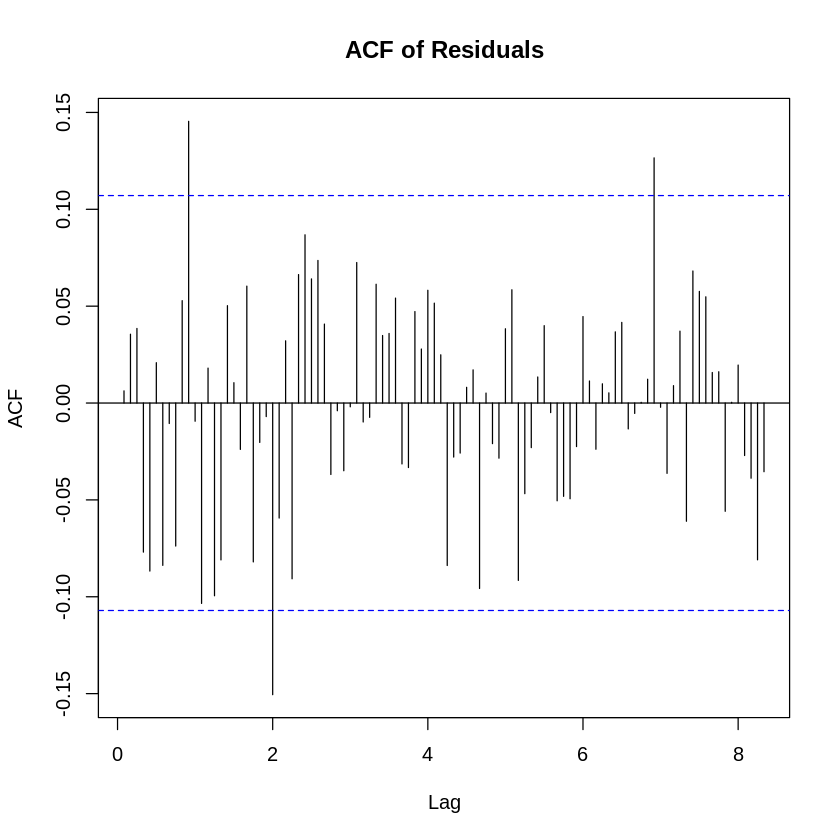

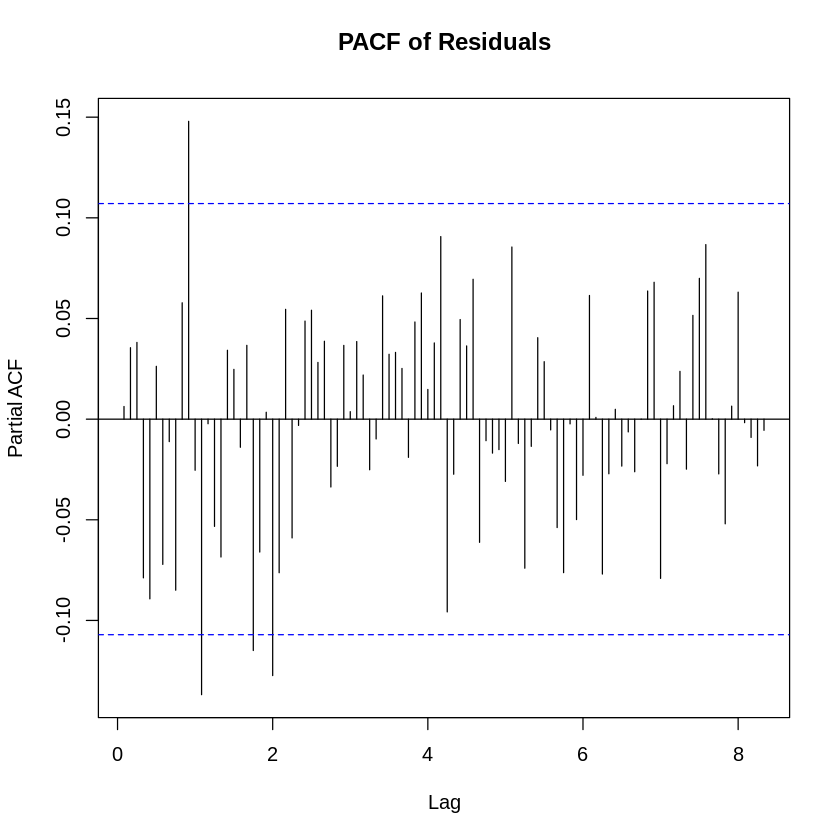

In [ ]:
# Extract residuals
resid_vals <- residuals(fit)

acf(resid_vals, main = "ACF of Residuals", lag.max = 100)
pacf(resid_vals, main = "PACF of Residuals", lag.max = 100)

par(mfrow = c(1, 1))  # Reset plotting layout



	Ljung-Box test

data:  Residuals from ARIMA(2,0,2)(1,1,1)[12]
Q* = 41.324, df = 18, p-value = 0.001373

Model df: 6.   Total lags used: 24



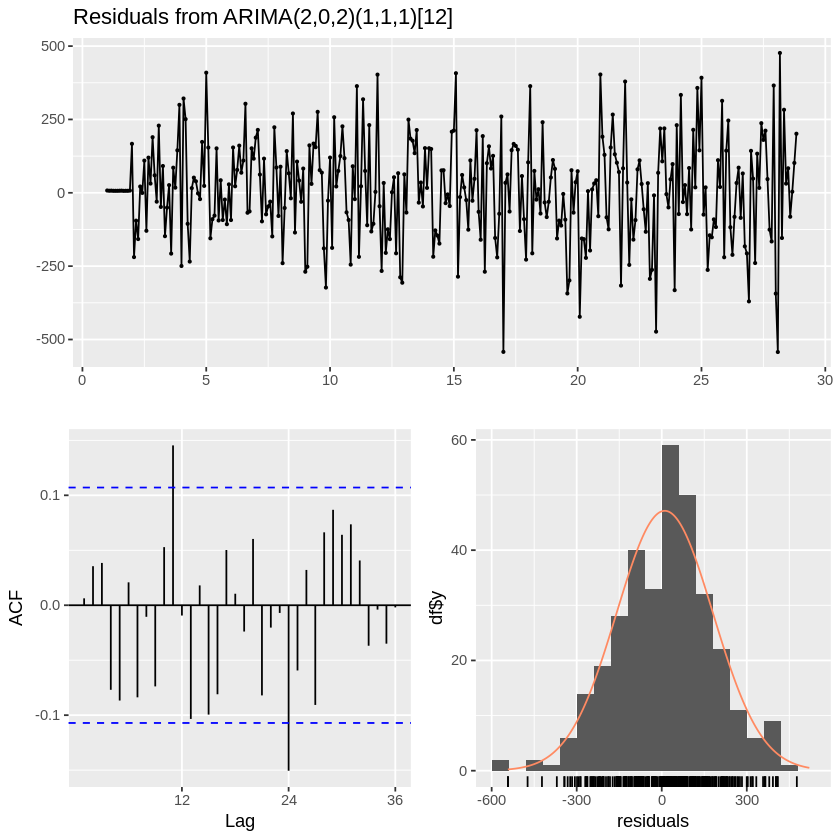

In [ ]:
checkresiduals(fit)


In [ ]:
library(forecast)

# STEP 1: Define time series
ts_gen <- ts(df$Electricity_Generation, frequency = 12)

# STEP 2: Split into training and test sets
n_total <- length(ts_gen)
n_test <- 24  # last 2 years
n_train <- n_total - n_test

train_ts <- window(ts_gen, end = c(floor(n_train / 12), n_train %% 12))
test_ts <- window(ts_gen, start = c(floor(n_train / 12) + 1, (n_train %% 12) + 1))

# STEP 3: Fit ARIMA model on training set
fit <- auto.arima(train_ts, seasonal = TRUE)

# STEP 4: Forecast for test period
forecast_vals <- forecast(fit, h = n_test)

# STEP 5: Compute test set accuracy
accuracy_metrics <- accuracy(forecast_vals, test_ts)
print(accuracy_metrics)


                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set   11.06824 164.0324 128.4718  0.1027999 1.607017 0.6392819
Test set     -184.79499 277.2202 218.3215 -2.3117524 2.712300 1.0863785
                    ACF1 Theil's U
Training set 0.006632828        NA
Test set     0.347416723 0.4839944
